# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Для проведения исследования в рамках поставленной задачи выполним следующие действия:**

- Изучим архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов:
    - Загрузим датасет и опишем данные, которые в нем представлены


- Обработаем данные из датасета если это необходимо:
    - Приведем данные к общему виду
    - При необходимости изменим типы данных и проведем их оптимизацию
    - Проверим наличие дубликатов и пропусков в данных и очистим от пропусков и дубликатов датасет там где это возможно
        
    
- Проведем анализ данных:
    - Определим какие новые данные понадобятся для проведения исследования и добавим их в датасет
    - Найдем аномальные значения если они есть с помощью методов визуализаций
    - Изучим частные параметры объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов и выясним:
        - Как быстро продаются квартиры?
        - Какие факторы больше всего влияют на итоговую стоимость объекта?
        
        
- Сформируем выводы

# Исследовательский анализ данных
## Описание данных

Данные объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов хранятся в файле `***`. Прочитаем файл и ознакомимся с общей информацией о датасете методом `info()` и просмотрим первые несколько строк датасета методом `head()`.

In [1]:
# Импрортируем необходимые для выполнения задач библиотеки:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Сохраним данные в переменную data.

data = pd.read_csv('***', sep='\t')

# Ознакомимся с общей информацией
print(data.info())
pd.set_option('display.max_columns', None)
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


В датасете представлены 23699 строк и 22 столбца с данными о продаже квартир в Санкт-Петербурге и соседних населённых пунктов, при этом пропуски есть в четырнадцати из двадцати двух столбцов. Во всех столбцах кроме: `total_images`, `last_price`, `total_area`, `first_day_exposition`, `rooms`, `floor`, `studio`, `open_plan`.

Приведем описание параметров обявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов(столбцов в датасете):
- `total_images` — Число фотографий квартиры в объявлении            
- `last_price` — Цена на момент снятия объявления с публикации       
- `total_area` — Общая площадь (м²)                                  
- `first_day_exposition` — Дата размещения                           
- `rooms` — Количество комнат
- `ceiling_height` — Высота потолков (м)
- `floors_total` — Общее количество этажей в доме
- `living_area` — Жилая площадь (м²)
- `floor` — Этаж
- `is_apartment` — Апартаменты
- `studio` — Студия
- `open_plan` — Открытая планировка
- `kitchen_area` — Площадь кухни (м²)
- `balcony` — Количество балконов
- `locality_name` — Населенный пункт
- `airports_nearest` — Расстояние до аэропорта (м)
- `cityCenters_nearest` — Расстояние до центра города (м) 
- `parks_around3000` — Количество парков в радиусе 3 км
- `parks_nearest` — Расстояние до ближайшего парка (м)
- `ponds_around3000` — Количество водоёмов в радиусе 3 км
- `ponds_nearest` — Расстояние до ближайшего водоёма (м)
- `days_exposition` — Сколько дней было размещено объявление (от публикации до снятия)



В объявлениях, представленных в датасете, есть 2 типа данных — данные заполненные пользователем и данные полученные автоматизированно на основе картографических данных. Это важно для выявления причин некорректности данных таких как пропуски. Если есть пропуски в данных полученных автоматизированно — причинами будут отсутствие данных или технические ошибки при их получении. Данные полученные автоматизировано на основе картографических данных:
- `airports_nearest`
- `cityCenters_nearest`
- `parks_around3000`
- `parks_nearest`
- `ponds_around3000`
- `ponds_nearest`

Построим гистограмму для всех числовых столбцов таблицы на одном графике для первичного просмотра данных:

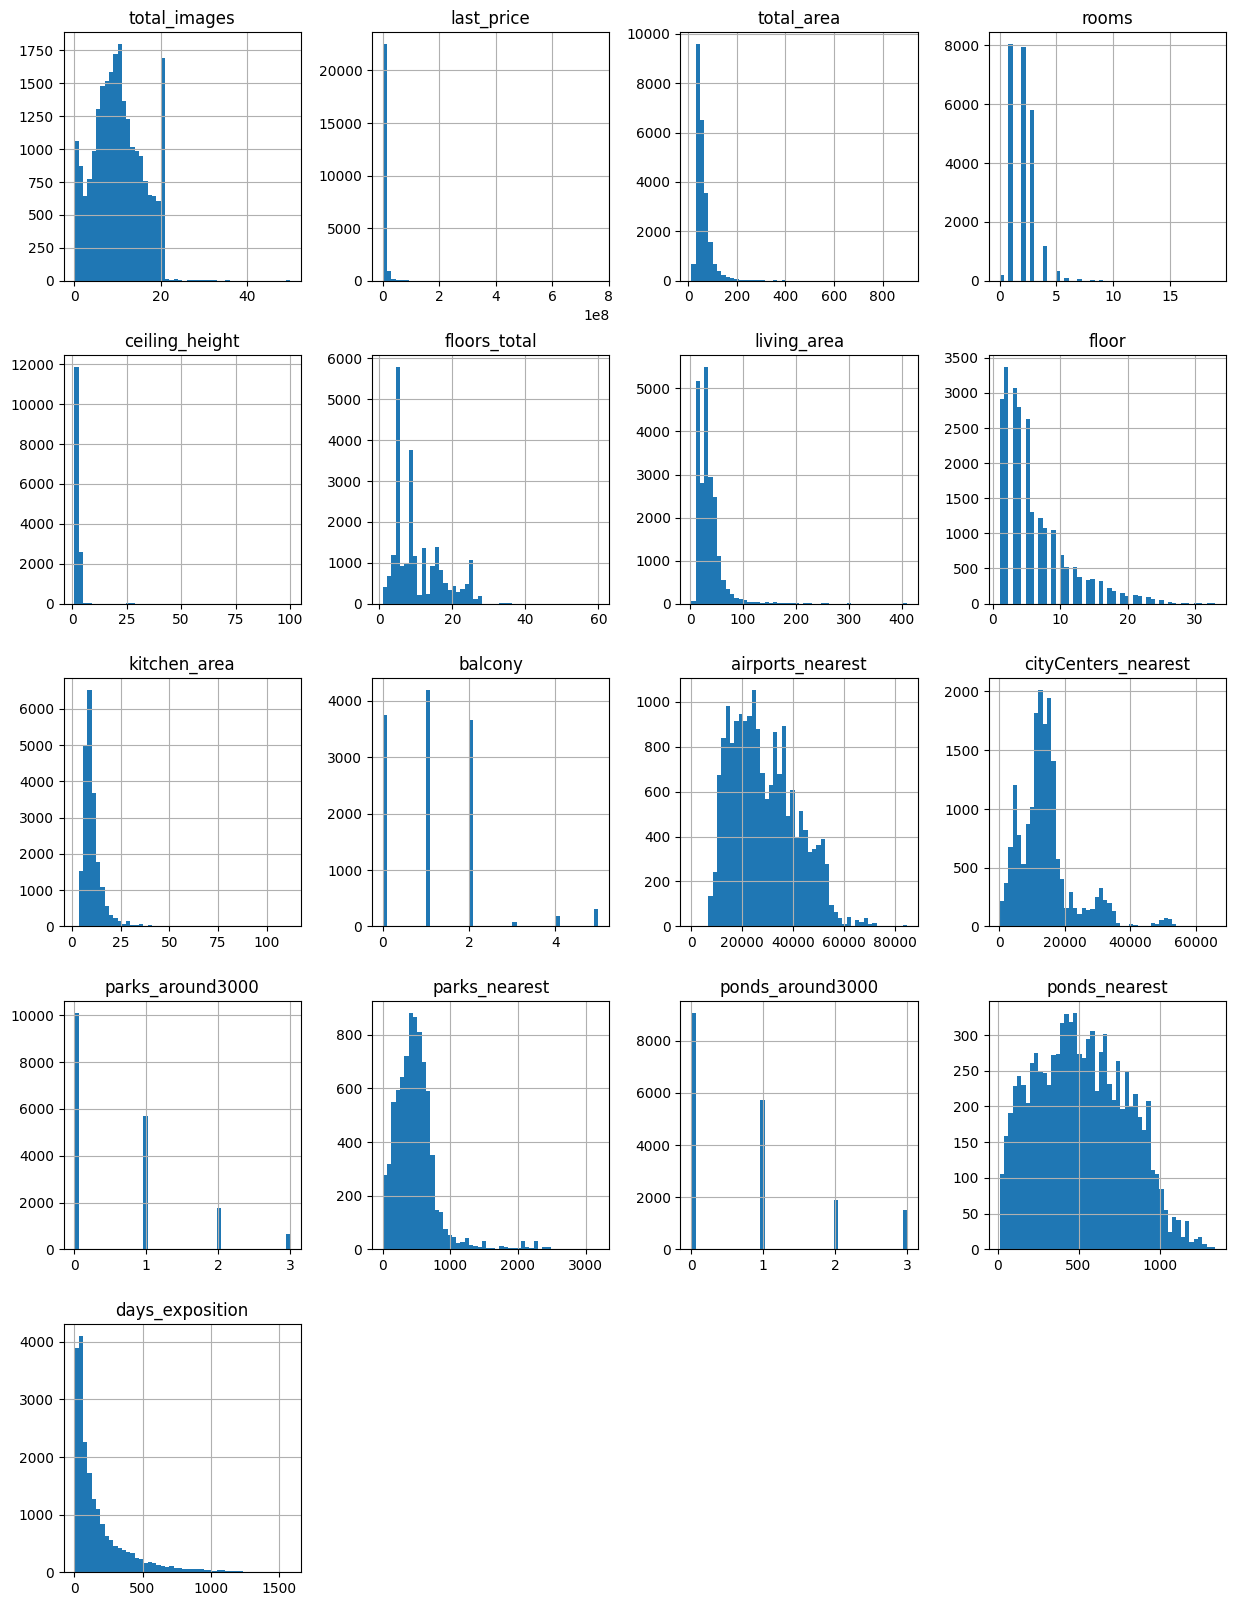

In [3]:
data.hist(bins=50, figsize=(15, 20));

В данных, представленных в датасете, можно четко увидеть нормальные или стремящиеся к ним распределения данных. Практически все данные в архиве объявлений имеют структуру распределения Гаусса или Пуассона. Это может свидетельствовать о правдоподобности данных. При этом в части данных, например в `total_images`, `floors_total`, `airports_nearest`, `cityCenters_nearest`, `ponds_nearest` встречаются редкие пики значений, что может указывать на наличие аномальных значений в данных.

### Результаты обзора данных

- В датасете представлены 23699 строк и 22 столбца с данными о продаже квартир в Санкт-Петербурге и соседних населённых пунктов, во всех столбцах кроме: `total_images`, `last_price`, `total_area`, `first_day_exposition`, `rooms`, `floor`, `studio`, `open_plan`имеются пропуски.
- В объявлениях, представленных в датасете, есть 2 типа данных — данные заполненные пользователем и данные полученные автоматизированно на основе картографических данных.
- В данных, представленных в датасете, можно четко увидеть нормальные или стремящиеся к ним распределения данных. При этом требуется обработка данных перед началом анализа.
- Объем занимаемой датасетом памяти:  3.7+ MB

## Предобработка данных

По итогам обзора датасета были обнаружены факторы которые "загрязняют" данные. Необходимо проверсти предобработку данных:
- Приведем данные к общему виду
- Проверим наличие дубликатов и пропусков в данных и очистим от пропусков и дубликатов датасет там где это возможно
- При необходимости изменим типы данных и проведем их оптимизацию

Приведем данные к общему виду. Изменим наименованиме столбца `cityCenters_nearest` на `city_centers_nearest`

In [4]:
# Для изменения имени столбца применим метод rename() и перезапишем данные в датафрейме с помощью inplace=True
data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)

### Обработка пропусков

Проверим наличине пропусков в данных:

In [5]:
#Посчитаем пропуски в каждом столбце
total_pass_before = data.isna().sum().sum()
print(f'Общее количество пропусков до обработки: {total_pass_before}')
data.isna().sum()

Общее количество пропусков до обработки: 101441


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Очистим данные от пропусков где это возможно:

- `ceiling_height` — высота потолков не должна сильно отличаться друг от друга, это подтверждает и первичный обзор данных, поэтому пропуски в этом столбце можно заполнить средним значением.
    
    
- `floors_total` — в будущем нам понадобиться провести категоризацию данных по этажу квартиры в объявлении по категориям "первый", "другой", и "последний", поэтому пропуски следует заполнить значением `floor` + 1, для того чтобы данные с пропущенными значениями не попали в категорию "последний", в будущем это может привести к неверным выводам в ходе исследования. 
    
    
- `living_area` — если это возможно заполним пропуски значением `total_area` - `kitchen_area`
    
    
- `is_apartment` — если пользователь не указал что это аппартаменты, то заполним пропущенные значения значением `False`
    
    
- `kitchen_area` — если это возможно заполним пропуски значением `total_area` - `living_area`
    
    
- `balcony` — если пользователь не указал количество балконов, то скорее всего их нет. Заполним пропуски значением `0`


- `locality_name` — пропуски заполним значением `unknown`


- `airports_nearest` — если данные не были получены, то скорее всего поблизости нет аэропортов, но если заполним каким-либо значением, то это может исказить данные при анализе, пропуски оставим


- `city_centers_nearest` — если данные не были получены, заполнить пропуски невозможно, это может исказить данные при анализе, пропуски оставим   


- `parks_around3000` — если данные не были получены, то скорее всего в радиусе 3км нет ни одного парка, пропуски заполним значением `0`


- `parks_nearest` — если данные не были получены, то скорее всего поблизости нет парков, но если заполним каким-либо значением, то это может исказить данные при анализе, пропуски оставим      


- `ponds_around3000` — если данные не были получены, то скорее всего в радиусе 3км нет ни одного водоема, пропуски заполним значением `0`


- `ponds_nearest` — если данные не были получены, то скорее всего поблизости нет водоемов, но если заполним каким-либо значением, то это может исказить данные при анализе, пропуски оставим      


- `days_exposition` — Если заполнить данные средним или даже медианным значением - это может изказить результаты анализа. Пропуски оставим

In [6]:
# Избавимся от пропусков там где мы это определили
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].mean())
data['floors_total'] = data['floors_total'].fillna(data['floor'] + 1)
data['is_apartment'] = data['is_apartment'].fillna(False)
data['balcony'] = data['balcony'].fillna(0)
data['locality_name'] = data['locality_name'].fillna('unknown')
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)


In [7]:
# Найдем усредненные доли жилой площади и площади кухни в общей площади
living_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()

# заполним пропуски
data['living_area'] = data['living_area'].fillna(living_ratio * data['total_area'])
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_ratio * data['total_area'])

# Проверим пропуски в каждом столбце после изменений
total_pass_after = data.isna().sum().sum()
print(f'Общее количество пропусков после обработки: {total_pass_after}')
print('Данные очищены от {:.1f}% пропусков.'.format(100 * (total_pass_before - total_pass_after) / total_pass_before))
data.isna().sum()                                                   

Общее количество пропусков после обработки: 44451
Данные очищены от 56.2% пропусков.


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

У нас получилось избавиться от пропусков в большей части данных. Более половины пропусков были устранены.

#### Оптимизация типов данных в датасете

Изменим типы данных в следующих столбцах:
- `first_day_exposition`
    - Изменим тип данных на `datetime`, для работы со временем и датой необходим тип `datetime` а не `object`
- `last_price`
    - Изменим тип данных на `int`, маловероятно что кто-то будет указывать стоимость квартиры с точностью до копейки, и даже если такие обяъвления есть - округление до целого значения не будет существенно влиять на выводы.
- `floors_total`
    - Изменим тип данных на `int`, этажей 2,5 или 7,75 быть не может
- `is_apartment`
    - Изменим тип данных на `bool`, приведем к типу данных столбцов `studio` и `open_plan`
- `balcony`
    - Изменим тип данных на `int`, балконов 2,5 или 7,75 быть не может    
- `parks_around3000`
    - Изменим тип данных на `int`, парков 2,5 или 7,75 быть не может
- `ponds_around3000`
    - Изменим тип данных на `int`, водоёмов 2,5 или 7,75 быть не может
- `days_exposition`
    - Изменим тип данных на `int`, данные описывают сколько дней было размещено объявление (от публикации до снятия) и должно быть выражено целым количеством дней
 

In [8]:
#Изменим тип даттых в 'first_day_exposition' с object на datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [9]:
# Создадим функцию для изменения типов данных
def type_changer(data, column, kind):
    data[column] = data[column].astype(kind)

In [10]:
# Изменим типы данных там где это необходимо
type_changer(data, 'last_price', int)
type_changer(data, 'floors_total', int)
type_changer(data, 'is_apartment', bool)
type_changer(data, 'balcony', int)
type_changer(data, 'parks_around3000', int)
type_changer(data, 'ponds_around3000', int)

In [11]:
# Для изменения типа данных в days_exposition с float на int используем следующую кострукцию:
data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')

Цель исследования - установить параметры, которые определяют рыночную стоимость объектов недвижимости. При этом результаты исследования будут использованы автоматизированной системой. Поэтому важным моментом будет являтся оптимизации числовых типов данных, которая позволит сократить используемую память. 

In [12]:
# Функция оптимизации типов данных в датасете.
def optimize_memory_usage(df, print_size=True):
    
    # Типы данных, которые будем проверять на оптимизацию.
    row = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    
    #Размер занимаемой памяти до оптимизации (в Мб).
    before_size = df.memory_usage().sum() / 1024**2    
    for column in df.columns:
        column_type = df[column].dtypes
        if column_type in row:
            column_min = df[column].min()
            column_max = df[column].max()
            if str(column_type).startswith('int'):
                if column_min > np.iinfo(np.int8).min and column_max < np.iinfo(np.int8).max:
                    df[column] = df[column].astype(np.int8)
                elif column_min > np.iinfo(np.int16).min and column_max < np.iinfo(np.int16).max:
                    df[column] = df[column].astype(np.int16)
                elif column_min > np.iinfo(np.int32).min and column_max < np.iinfo(np.int32).max:
                    df[column] = df[column].astype(np.int32)
                elif column_min > np.iinfo(np.int64).min and column_max < np.iinfo(np.int64).max:
                    df[column] = df[column].astype(np.int64)  
            else:
                if column_min > np.finfo(np.float32).min and column_max < np.finfo(np.float32).max:
                    df[column] = df[column].astype(np.float32)                      
                else:
                    df[column] = df[column].astype(np.float64)
    
    #Размер занимаемой памяти после оптимизации (в Мб).
    after_size = df.memory_usage().sum() / 1024**2
    if print_size:
        print('Размер занимаемой памяти: до {:5.4f} Mb - после {:5.4f} Mb. Размер занимаемой памяти сокращен на {:.1f}%.'
              .format(before_size, after_size, 100 * (before_size - after_size) / before_size))
    
# И применим фнкуцию оптимизации к нашему датасету
optimize_memory_usage(data)

Размер занимаемой памяти: до 3.0739 Mb - после 1.6048 Mb. Размер занимаемой памяти сокращен на 47.8%.


Функция оптимизации позволила сократить размер занимаемой памяти на 47.8%. При больших объемах данных это существенный результат.

### Работа с дубликатами

Работа с пропусками и типами данных завершена. Последним этапом перед анализом данных является обработка дубликатов.
- Удалим явные дубликаты если они есть
- Неявные дубликаты возможны только в `locality_name`

In [13]:
# Удалим явные дубликаты если они есть и обновим индексы
data = data.drop_duplicates().reset_index(drop=True)

In [1]:
# Найдем неявные дубликаты изучив уникальные значения в `locality_name`
# sorted(data['locality_name'].unique())

In [15]:
# Проверим количество уникальных значений
total_names_before = len(sorted(data['locality_name'].unique()))
print(f' Количество уникальных значений в `locality_name`: {total_names_before}')

 Количество уникальных значений в `locality_name`: 365


В наименованиях населенных пунктов 365 уникальных значений, при этом встречаются дубликаты, например `посёлок` и `поселок`, `городской поселок` и `поселок городского типа` (Городской посёлок (сокращённо — Г.п.) — тип населённого пункта в Белоруссии, Казахстане, России и Эстонии, то же, что и посёлок городского типа, либо название его разновидности.) и другие дубликаты. Изменим значения следующим образом:

- `городской посёлок`, `посёлок городского типа`:   
    - Приведем к виду `поселок городского типа`


- `поселок станции`, `посёлок при железнодорожной станции`, `посёлок станции`, `посёлок`:   
    - Приведем к виду `поселок`


- `коттеджный поселок`, `садоводческое некоммерческое товарищество`:   
    - Приведем к виду `садовое товарищество`

In [16]:
# Создадим функцию для переименования значений в датафрейме встречающихся в заданном списке на конкретное значение
def locality_name_changer(row, new_name):
    data['locality_name'] = data['locality_name'].replace(row, new_name, regex=True)

In [17]:
# Применим функцию к тем наименованиям населенных пунктов, которое изменим
locality_name_changer(
    ['городской посёлок', 'посёлок городского типа'], 'поселок городского типа'
)
locality_name_changer(
    ['поселок станции', 'посёлок при железнодорожной станции', 'посёлок станции', 'посёлок'], 'поселок'
)
locality_name_changer(
    ['коттеджный поселок', 'садоводческое некоммерческое товарищество'], 'садовое товарищество'
)

In [18]:
# Проверим количество уникальных значений после применения функции locality_name_changer
total_names_after = len(sorted(data['locality_name'].unique()))
print(f'Количество уникальных значений в `locality_name` после первичной обработки: {total_names_after}')

Количество уникальных значений в `locality_name` после первичной обработки: 323


Количество уникальных значений сократилось - очистили датасет от части неявных дубликатов.

Типы населенных путнктов привели к единому виду, но в данных могут быть и другие неявные дубликаты. Например, `Бокситогорск` и `поселок Бокситогорск`. Данные необходимо очистить и от таких дубликатов. Сделаем это так:
 - Возьмем список уникальных значений столбца `locality_name` и сравним в нем все значения. Первый элемент сравним с каждым последующим и если найдем совпадение то это совпадение изменим на тот что проверяем. Например проверяем `Бокситогорск` и если встретится `поселок Бокситогорск`, то заменим его на `Бокситогорск`.

In [19]:
# Циклом избавимся от неявных дубликатов
for m in sorted(data['locality_name'].unique()):
    for n in sorted(data['locality_name'].unique()):
        if m in n:
            data['locality_name'] = data['locality_name'].replace(n, m, regex=True)

In [20]:
# Проверим количество уникальных значений после удаления остаточных неявных дубликатов.
total_names_after = len(sorted(data['locality_name'].unique()))
print(f'Количество уникальных значений в `locality_name` после обработки: {total_names_after}')
print(f'Данные в наименованиях населенных пунков очищены от {total_names_before - total_names_after} дубликатов')

Количество уникальных значений в `locality_name` после обработки: 313
Данные в наименованиях населенных пунков очищены от 52 дубликатов


Количество уникальных значений снова сократилось - оставшиеся неявные дубликаты были удалены.

### Результаты предобработки данных

- Столбцы приведены к общему виду
- Данные очищены от 56,2% пропусков 
- Изменены и оптимизированы типы данных в датасете, что позволило уменьшить объем занимаемой датасетом памяти на 47.8%
- Данные очищены как от явных так и от неявных дубликатов. Удалены 52 неявных дубкликата

## Исследовательский анализ данных

В результате исследовательского анализа данных необходимо ответить на следующие вопросы:
- Как быстро продавались квартиры?
- Какие факторы больше всего влияют на общую (полную) стоимость объекта?
- Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.


Для решения поставленных задач при проведении исследовательского анализа данных сделаем следующее:
  - Найдем аномальные значения в датасете и постараемся от них избавиться
  - Определим какие новые данные понадобятся для проведения исследования и добавим их в датасет
  - Изучим частные параметры объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов

### Работа с аномальными значениями

Изучим данные с помощью статистики числовых значений и визуализации и если найдем аномальные значения - удалим или скорректируем их в следующих параметрах:
- `last_price` — Цена на момент снятия объявления с публикации
- `total_area` — Общая площадь (м²)
- `rooms` — Количество комнат
- `ceiling_height` — Высота потолков (м)
- `floors_total` — Общее количество этажей в доме
- `living_area` — Жилая площадь (м²)
- `floor` — Этаж
- `kitchen_area` — Площадь кухни (м²)
- `balcony` — Количество балконов
- `airports_nearest` — Расстояние до аэропорта (м)
- `city_centers_nearest` — Расстояние до центра города (м) 
- `parks_nearest` — Расстояние до ближайшего парка (м)

Для поиска аномальных значений в данных будем использовать следующий алгоритм действий:
- методом `describe()` получим статистику числовых значений параметра.
- методами `hist()` и `boxplot()` визуализируем данные
- по результатам предыдущих этапов определяем аномальные значения в данных
- удаляем или корректируем аномальные значения если это возможно
- результаты сохраняем в новый датафрейм
    - действия, которые мы выполнили для обработки данных (работа с пропусками, дубликатами и типами данных) могут быть автоматизированы. Работа с аномальными значениями и проведение анализа данных зависят от конкретных задач и алгоритм действий может быть разным, поэтому результаты сохраняем в новый датафрейм и весь предстоящий анализ проведем в нем.

In [21]:
# сохраним данные в новый датасет:
data_analys = data

##### Поиск аномальных значений в `last_price`:

In [22]:
# Для более приятного восприятия переведем значения из 'last_price' в тысячи
data_analys['last_price'] = (data_analys['last_price'] / 1000).round(decimals=2)

In [23]:
# Изучим статистику значений 'last_price'
data_analys['last_price'].describe()

count     23699.000000
mean       6541.548770
std       10887.013268
min          12.190000
25%        3400.000000
50%        4650.000000
75%        6800.000000
max      763000.000000
Name: last_price, dtype: float64

Минимальное значение стоимости квартиры ~ 12 тысяч, кажется неправдопадобным. Средняя стоимость квартир ~ 6,5 млн. при медиане ~ 4,6 млн., разница значительная и можно предположить, что в данных есть аномально высокие значения.

Посмотрим на минимальные значения 'last_price':

In [24]:
# Отсортируем данные и изучим минимальные значения и количество аномалий
data_analys.sort_values(by='last_price').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12.19,109.0,2019-03-20,2,2.750000,25,32.000000,25,False,False,False,40.500000,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8
17456,7,430.00,30.4,2019-04-22,1,2.771499,2,16.000000,1,False,False,False,6.000000,0,Сланцы,NaN,NaN,0,NaN,0,NaN,<NA>
14911,5,430.00,54.0,2018-06-26,2,2.771499,3,30.832901,3,False,False,False,9.457869,0,поселок Свирь,NaN,NaN,0,NaN,0,NaN,44
16274,18,440.00,40.0,2018-07-10,1,2.771499,5,22.839186,1,False,False,False,7.005828,0,деревня Старополье,NaN,NaN,0,NaN,0,NaN,45
17676,0,450.00,36.5,2018-02-01,1,2.771499,5,17.299999,4,False,False,False,8.500000,1,деревня Ям-Тесово,NaN,NaN,0,NaN,0,NaN,120


Удаляем аномальное значение:

In [25]:
# Удаляем аномальные значения в 'last_price':
data_analys = data_analys.query('last_price > last_price.min()')

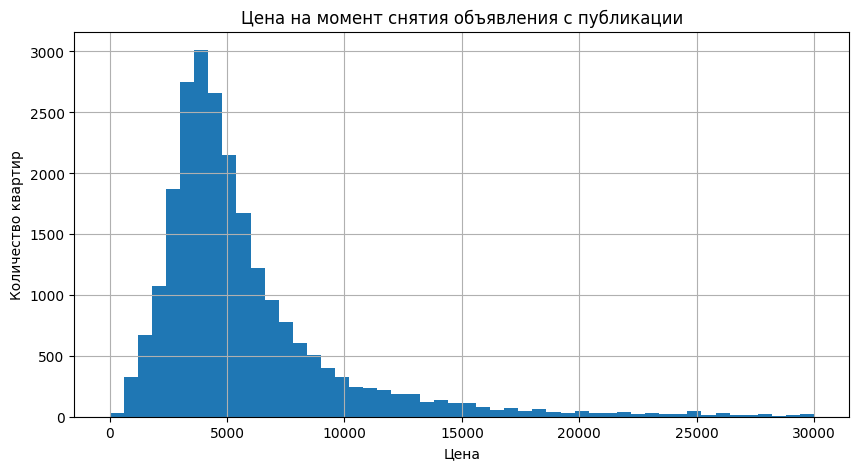

In [26]:
# Построим и изучим гистограмму по 'last_price'
plt.figure(figsize=(10, 5))
plt.hist(data_analys['last_price'], bins=50, range=[0, 30000])
plt.grid()
plt.title('Цена на момент снятия объявления с публикации')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.show()

В данных определенно присутствуют выбросы, аномальные знчения, которые искажают данные. Для определения границ аномальных значений применим функцию `boxplot()`:

(0.0, 30000.0)

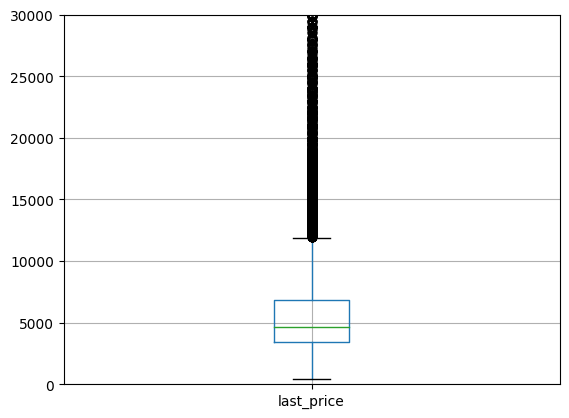

In [27]:
# Построим и изучим диаграмму размаха 'last_price', для масштабирования укажем границы оси y:
data_analys.boxplot('last_price').set_ylim([0, 30000])

Действительно, данные о квартирах стоимостью более 12 000 тыс. являются выбросами, аномалиями. При этом на гистограмме видно, что данные довольно часто встречаются до уровня цены в 16 000 - 17 000 тыс. Данные до 16 500 тыс оставим, остальные удалим:

In [28]:
# Удаляем аномальные значения в 'last_price':
data_analys = data_analys.query('last_price < 16500')

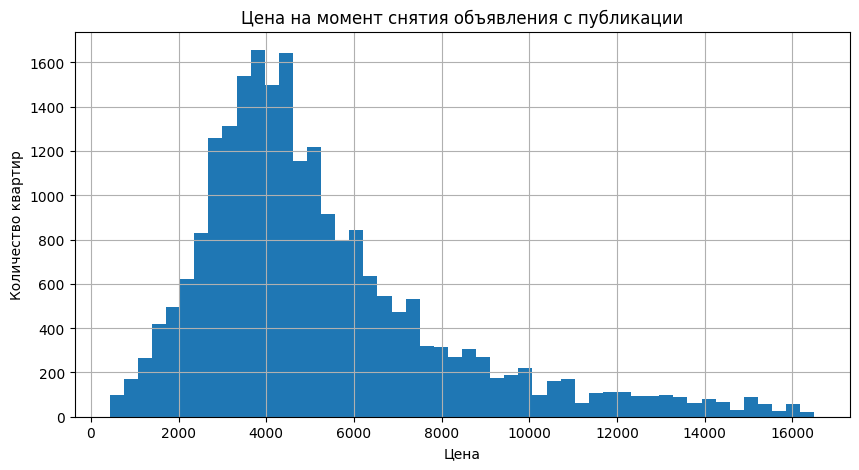

In [29]:
# Построим и изучим гистограмму по 'last_price' после удаления аномальных значений
plt.figure(figsize=(10, 5))
plt.hist(data_analys['last_price'], bins=50)
plt.grid()
plt.title('Цена на момент снятия объявления с публикации')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.show()

Данные выглядят правдоподобно.

##### Поиск аномальных значений в `total_area`:

In [30]:
# Изучим статистику значений 'total_area'
data_analys['total_area'].describe()

count    22665.000000
mean        55.692211
std         22.779110
min         12.000000
25%         39.599998
50%         50.560001
75%         66.199997
max        320.000000
Name: total_area, dtype: float64

Средняя площадь квартир ~ 53.4 м². при медиане ~ 49.4 м², разница незначительная при этом можно предположить, что в данных есть аномально высокие значения, но их не так много.

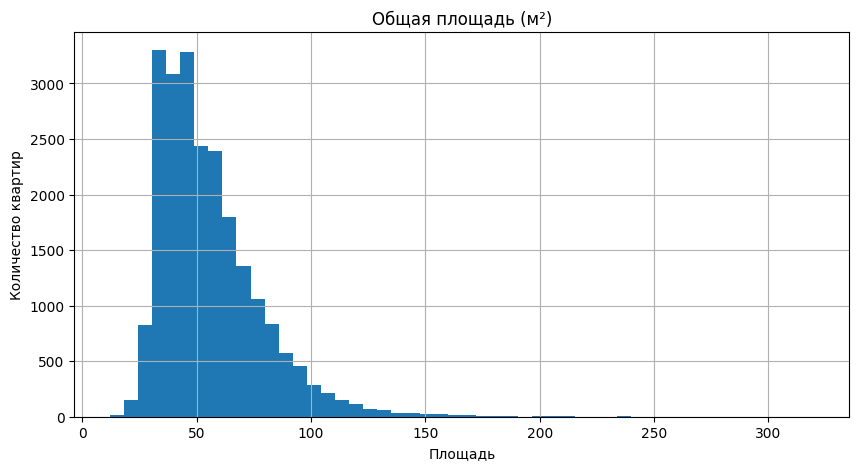

In [31]:
# Построим и изучим гистограмму по 'total_area'
plt.figure(figsize=(10, 5))
plt.hist(data_analys['total_area'], bins=50)
plt.grid()
plt.title('Общая площадь (м²)')
plt.xlabel('Площадь')
plt.ylabel('Количество квартир')
plt.show()

Действительно, в данных присутствуют аномальные знчения, которые искажают данные. Для определения границ аномальных значений применим функцию `boxplot()`:

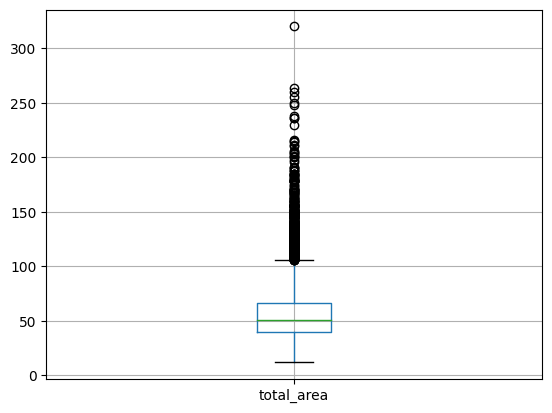

In [32]:
# Построим и изучим диаграмму размаха 'total_area':
data_analys.boxplot('total_area');

Диаграмма размаха указывает на верхнюю границу 100 м², при этом на гистограмме данные довольно часто встречаются до значения 150 м². Статистика значений также не показала серьезных отклонений. Данные до 150 м² оставим, остальные удалим. Скорректировать данные не предсталяется возможным.

In [33]:
# Удаляем аномальные значения в 'total_area':
data_analys = data_analys.query('total_area <= 150')

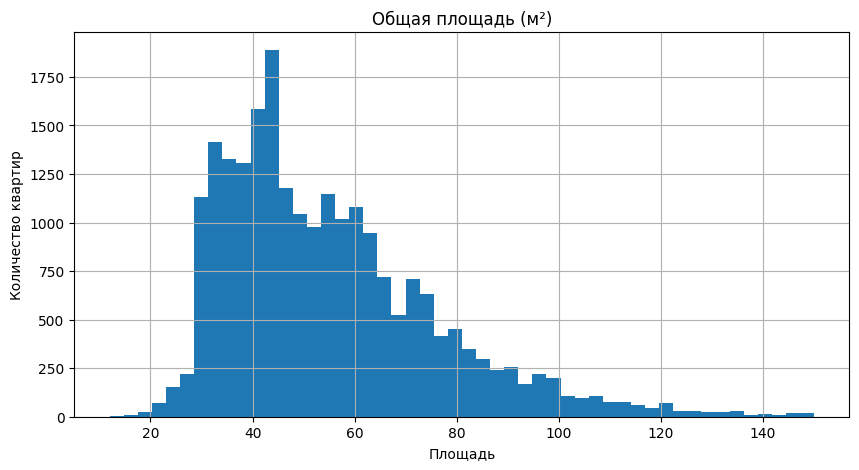

In [34]:
# Построим гистограмму по 'total_area' после удаления аномальных значений:
plt.figure(figsize=(10, 5))
plt.hist(data_analys['total_area'], bins=50)
plt.grid()
plt.title('Общая площадь (м²)')
plt.xlabel('Площадь')
plt.ylabel('Количество квартир')
plt.show()

Данные выглядят правдоподобно.

##### Поиск аномальных значений в `rooms`:

In [35]:
# Изучим статистику значений 'rooms'
data_analys['rooms'].describe()

count    22554.000000
mean         1.973752
std          0.936281
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

Минимально значение 0 - квартиры без комнат - крайне подозрительно. Среднее значение и медиана отличаются мене чем на 5%.

In [36]:
# Удаляем аномальные значения в 'rooms':
data_analys = data_analys.query('rooms != 0')

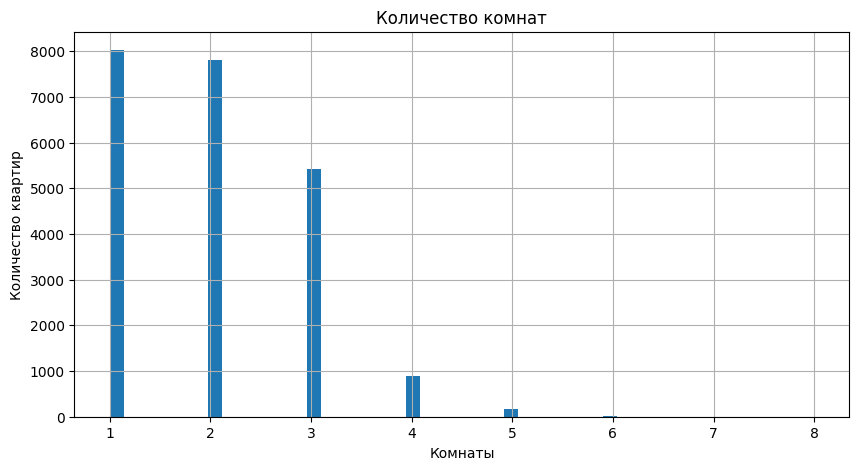

In [37]:
# Построим и изучим гистограмму по 'rooms'
plt.figure(figsize=(10, 5))
plt.hist(data_analys['rooms'], bins=50)
plt.grid()
plt.title('Количество комнат')
plt.xlabel('Комнаты')
plt.ylabel('Количество квартир')
plt.show()

Данные не искажены, аномальных значений нет или они не влияют на распределение данных и статистику числовых значений. 

Данные выглядят правдоподобно.

##### Поиск аномальных значений в `ceiling_height`:

In [38]:
# Изучим статистику значений 'ceiling_height'
data_analys['ceiling_height'].describe()

count    22358.000000
mean         2.756407
std          0.996674
min          1.000000
25%          2.600000
50%          2.771499
75%          2.771499
max        100.000000
Name: ceiling_height, dtype: float64

Минимальное значение высоты потолков - 1 м, а максимальное - 32 м, выглядит неправдоподобно. Разница между средним значением и медианой незначительна. Изучим данные подробнее:

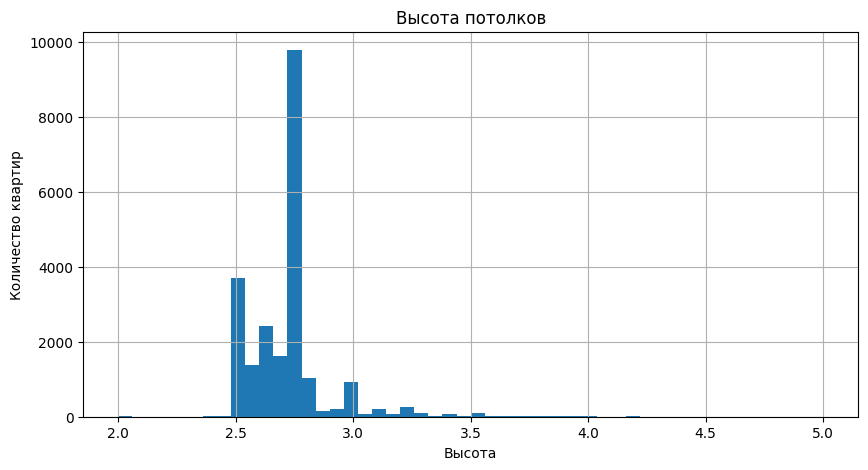

In [39]:
# Построим и изучим гистограмму по 'ceiling_height'
plt.figure(figsize=(10, 5))
plt.hist(data_analys['ceiling_height'], bins=50, range = [2, 5])
plt.grid()
plt.title('Высота потолков')
plt.xlabel('Высота')
plt.ylabel('Количество квартир')
plt.show()

Действительно, в данных присутствуют аномальные знчения, которые искажают данные. Для определения границ аномальных значений применим функцию `boxplot()`:

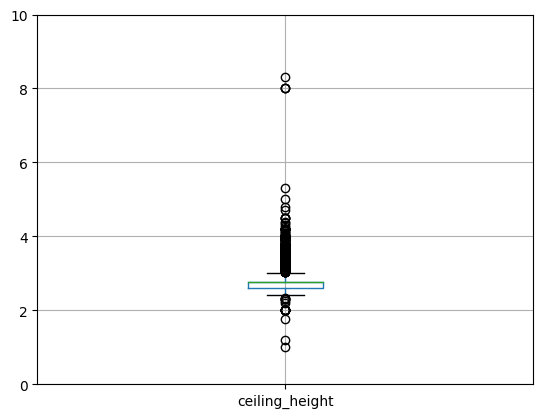

In [40]:
# Построим и изучим диаграмму размаха 'ceiling_height':
data_analys.boxplot('ceiling_height').set_ylim([0, 10]);

Диаграмма размаха указывает на границы ~ 2,4м - 3м. Гистограмма - 2,5м - 3,5м. Возьмем больший диапазон значений чтобы потерять меньше данных. Остальные данные удалим.

In [41]:
# Удаляем аномальные значения в 'ceiling_height':
data_analys = data_analys.query('2.4 <= ceiling_height <= 3.5')

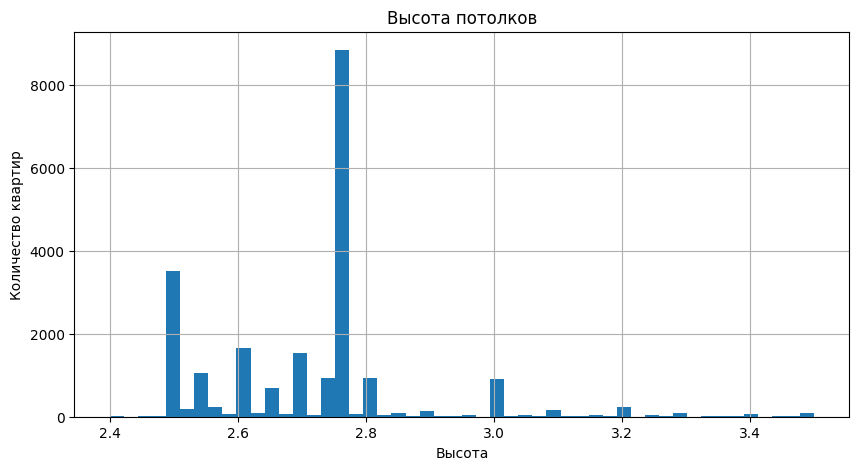

In [42]:
# Построим гистограмму по 'ceiling_height' после удаления аномальных значений:
plt.figure(figsize=(10, 5))
plt.hist(data_analys['ceiling_height'], bins=50)
plt.grid()
plt.title('Высота потолков')
plt.xlabel('Высота')
plt.ylabel('Количество квартир')
plt.show()

Данные выглядят правдоподобно.

##### Поиск аномальных значений в `floors_total`:

In [43]:
# Изучим статистику значений 'floors_total'
data_analys['floors_total'].describe()

count    22140.000000
mean        10.766396
std          6.615002
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Разница между средним значением и медианой незначительна. Изучим данные подробнее:

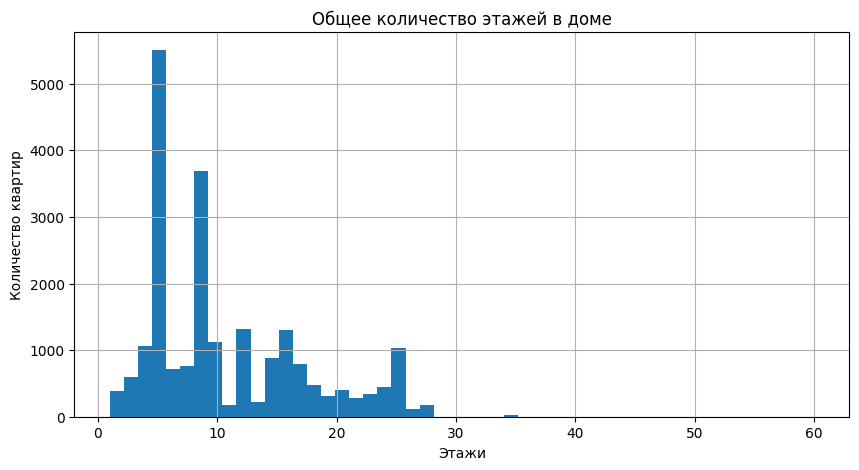

In [44]:
# Построим и изучим гистограмму по 'floors_total'
plt.figure(figsize=(10, 5))
plt.hist(data_analys['floors_total'], bins=50)
plt.grid()
plt.title('Общее количество этажей в доме')
plt.xlabel('Этажи')
plt.ylabel('Количество квартир')
plt.show()

В данных присутствуют аномальные знчения, при этом они практически не влияют на статистические показатели. Для определения границ аномальных значений применим функцию `boxplot()`:

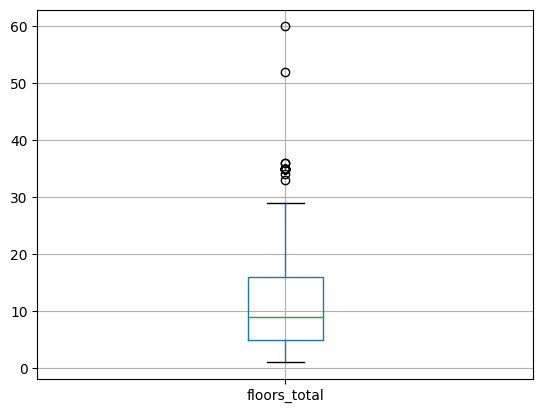

In [45]:
# Построим и изучим диаграмму размаха 'floors_total':
data_analys.boxplot('floors_total');

Диаграмма размаха указывает что квартиры в домах, в которых более 30 этажей - аномалии. Удалим аномалии.

In [46]:
# Удаляем аномальные значения в 'floors_total':
data_analys = data_analys.query('floors_total < 30')

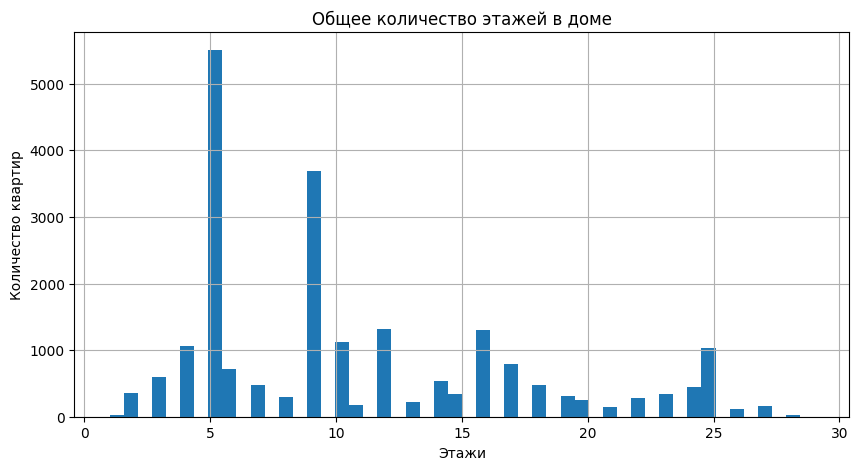

In [47]:
# Построим гистограмму по 'floors_total' после удаления аномальных значений:
plt.figure(figsize=(10, 5))
plt.hist(data_analys['floors_total'], bins=50)
plt.grid()
plt.title('Общее количество этажей в доме')
plt.xlabel('Этажи')
plt.ylabel('Количество квартир')
plt.show()

Данные выглядят правдоподобно.

##### Поиск аномальных значений в `living_area`:

In [48]:
# Изучим статистику значений 'living_area'
data_analys['living_area'].describe()

count    22112.000000
mean        31.568775
std         14.285467
min          2.000000
25%         18.700001
50%         29.900000
75%         40.000000
max        128.000000
Name: living_area, dtype: float64

Минимальное значение жилой площади 2м², выглядит неправдоподобно. Разница между средним значением и медианой незначительна. Изучим данные подробнее:

Посмотрим на минимальные значения 'living_area':

In [49]:
# Отсортируем данные и изучим минимальные значения и количество аномалий в living_area
data_analys.sort_values(by='living_area').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
13915,20,6350.0,52.000000,2018-02-06,2,3.000000,6,2.000000,2,False,False,False,9.000000,0,Санкт-Петербург,32453.0,6521.0,0,NaN,1,1012.0,91
3242,7,4440.0,41.000000,2017-07-02,1,2.771499,17,3.000000,17,False,False,False,11.000000,0,Санкт-Петербург,19272.0,13073.0,0,NaN,0,NaN,216
21943,15,6100.0,77.599998,2019-02-28,4,2.500000,9,5.400000,1,False,False,False,9.800000,0,Санкт-Петербург,29338.0,11270.0,1,584.0,0,NaN,33
16431,13,3799.0,31.000000,2018-04-12,1,2.600000,5,6.000000,1,False,False,False,17.000000,0,Санкт-Петербург,32177.0,4826.0,1,430.0,0,NaN,168
19251,19,4050.0,33.000000,2018-10-15,1,2.500000,22,6.500000,21,False,False,False,18.000000,0,Санкт-Петербург,9258.0,10592.0,1,458.0,0,NaN,44
17961,3,1400.0,13.000000,2017-12-03,1,2.600000,9,7.422736,1,False,False,False,2.276894,0,Санкт-Петербург,14350.0,15945.0,0,NaN,1,185.0,410
19546,3,1850.0,13.000000,2019-03-11,1,3.400000,5,7.422736,2,False,False,False,2.276894,0,Санкт-Петербург,24915.0,5483.0,1,644.0,0,NaN,24
19558,2,1686.0,13.200000,2018-12-17,1,2.771499,5,7.536932,1,False,False,False,2.311923,0,Санкт-Петербург,19891.0,4165.0,1,361.0,1,155.0,19
23208,12,4800.0,37.000000,2016-02-24,1,2.771499,14,8.000000,11,False,False,False,22.000000,0,Санкт-Петербург,27838.0,12387.0,2,358.0,1,950.0,139
20994,7,8900.0,50.599998,2018-10-22,2,2.500000,7,8.000000,3,False,False,False,31.000000,0,Санкт-Петербург,12771.0,8301.0,1,173.0,3,126.0,<NA>


Четырехкомнатная квартира с жилой пложадью в 5.4м² - крайне подозрительно. Удалим аномалии:

In [50]:
# Удаляем аномальные значения в 'living_area':
data_analys = data_analys.query('6 <= living_area')

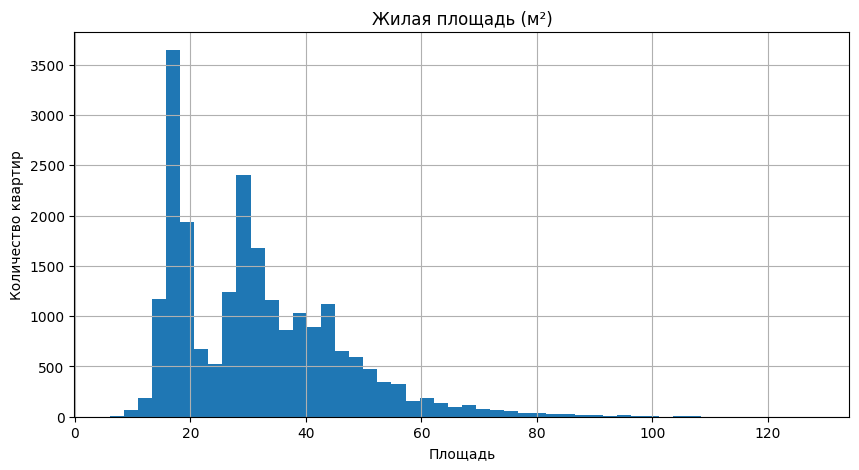

In [51]:
# Построим и изучим гистограмму по 'living_area'
plt.figure(figsize=(10, 5))
plt.hist(data_analys['living_area'], bins=50)
plt.grid()
plt.title('Жилая площадь (м²)')
plt.xlabel('Площадь')
plt.ylabel('Количество квартир')
plt.show()

В данных присутствуют аномально высокие значения. Для определения границ аномальных значений применим функцию `boxplot()`:

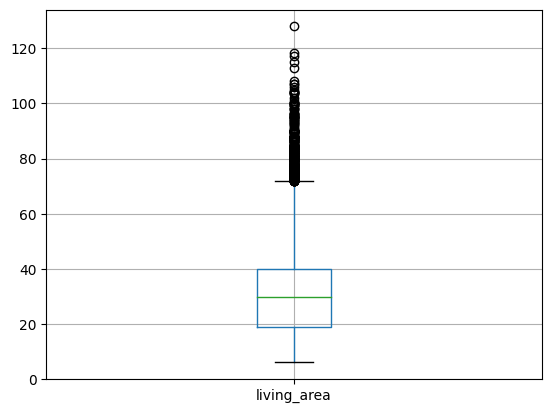

In [52]:
# Построим и изучим диаграмму размаха 'living_area':
data_analys.boxplot('living_area');

Диаграмма размаха указывает на границы ~ до 70м². Гистограмма показывает что данные довольно часто встречаются вплоть до 80м². Возьмем больший диапазон значений чтобы потерять меньше данных. Остальные данные удалим.

In [53]:
# Удаляем аномальные значения в 'living_area':
data_analys = data_analys.query('living_area <= 80')

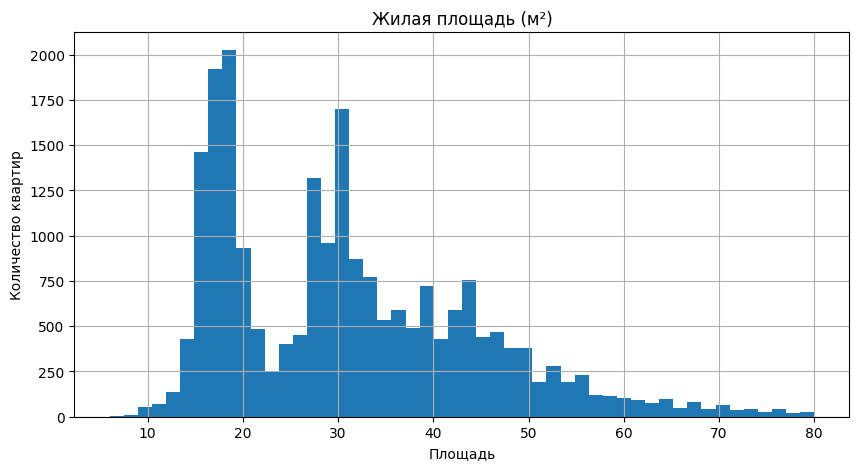

In [54]:
# Построим гистограмму по 'living_area' после удаления аномальных значений:
plt.figure(figsize=(10, 5))
plt.hist(data_analys['living_area'], bins=50)
plt.grid()
plt.title('Жилая площадь (м²)')
plt.xlabel('Площадь')
plt.ylabel('Количество квартир')
plt.show()

Данные выглядят правдоподобно.

##### Поиск аномальных значений в `floor`:

In [55]:
# Изучим статистику значений 'floor'
data_analys['floor'].describe()

count    21952.000000
mean         5.897595
std          4.878468
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

Разница между средним значением и медианой достаточно большая, есть данные с очень высокими значениями. Изучим данные подробнее:

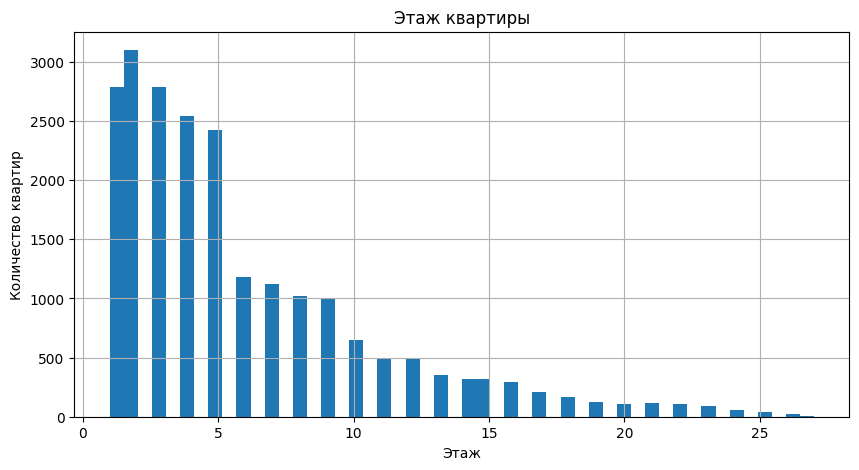

In [56]:
# Построим и изучим гистограмму по 'floor'
plt.figure(figsize=(10, 5))
plt.hist(data_analys['floor'], bins=50)
plt.grid()
plt.title('Этаж квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

Данные выглядят правдоподобно. Для определения границ аномальных значений применим функцию `boxplot()`:

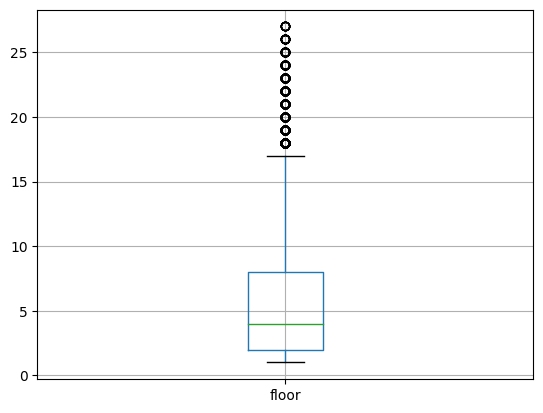

In [57]:
# Построим и изучим диаграмму размаха 'floor':
data_analys.boxplot('floor');

Диаграмма размаха указывает на границы ~ до 17м. При этом аномальных значений слишком мало. Данные оставим.

##### Поиск аномальных значений в `kitchen_area`:

In [58]:
### Изучим статистику значений 'kitchen_area'
data_analys['kitchen_area'].describe()

count    21952.000000
mean         9.783925
std          4.207144
min          1.300000
25%          7.000000
50%          9.000000
75%         11.200000
max         64.000000
Name: kitchen_area, dtype: float64

Разница между средним значением и медианой незначительна. Но есть аномально выские значения. Изучим данные подробнее:

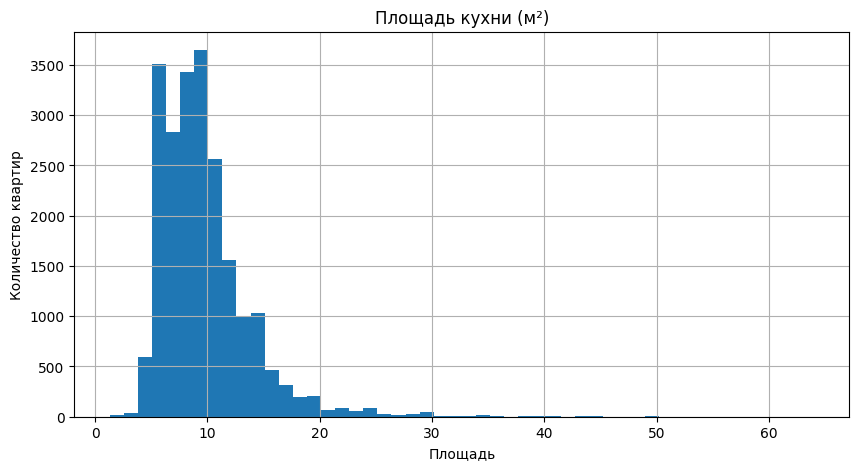

In [59]:
# Построим и изучим гистограмму по 'kitchen_area'
plt.figure(figsize=(10, 5))
plt.hist(data_analys['kitchen_area'], bins=50)
plt.grid()
plt.title('Площадь кухни (м²)')
plt.xlabel('Площадь')
plt.ylabel('Количество квартир')
plt.show()

Действительно, в данных присутствуют аномально высокие знчения, которые искажают данные. Для определения границ аномальных значений применим функцию `boxplot()`:

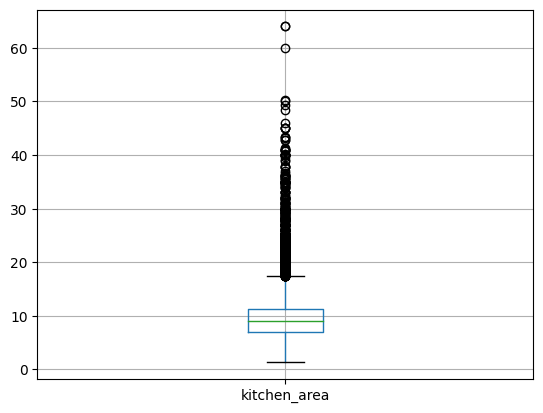

In [60]:
# Построим и изучим диаграмму размаха 'kitchen_area':
data_analys.boxplot('kitchen_area');

Диаграмма размаха указывает на границы ~ до 17м². Гистограмма показывает что данные довольно часто встречаются вплоть до 30м². Возьмем больший диапазон значений чтобы потерять меньше данных. Остальные данные удалим.

In [61]:
# Удаляем аномальные значения в 'kitchen_area':
data_analys = data_analys.query('kitchen_area <= 30')

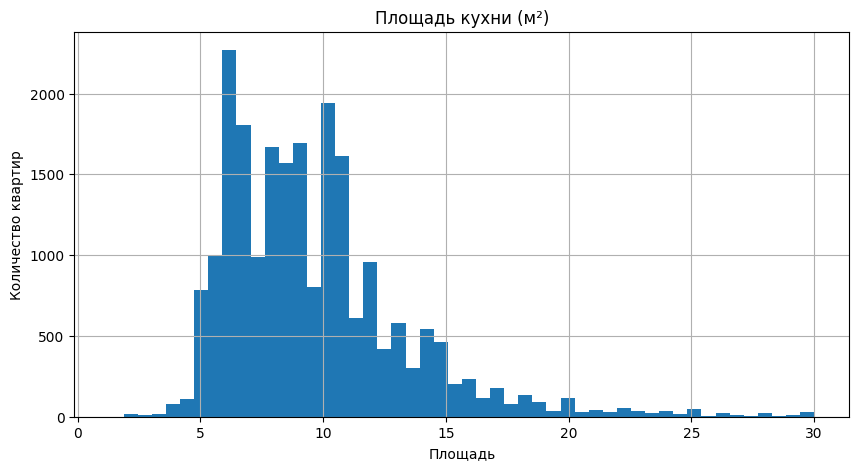

In [62]:
# Построим гистограмму по 'kitchen_area' после удаления аномальных значений:
plt.figure(figsize=(10, 5))
plt.hist(data_analys['kitchen_area'], bins=50)
plt.grid()
plt.title('Площадь кухни (м²)')
plt.xlabel('Площадь')
plt.ylabel('Количество квартир')
plt.show()

Данные выглядят правдоподобно.

##### Поиск аномальных значений в `balcony`:

In [63]:
# Изучим статистику значений 'balcony'
data_analys['balcony'].describe()

count    21853.000000
mean         0.593420
std          0.952288
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

Более чем в половине квартир нет балконов. Выглядит странно, возможно при выставлении объявлений на продажу квартир пользователи просто не указывают количество балконов. Изучим данные подбробнее:

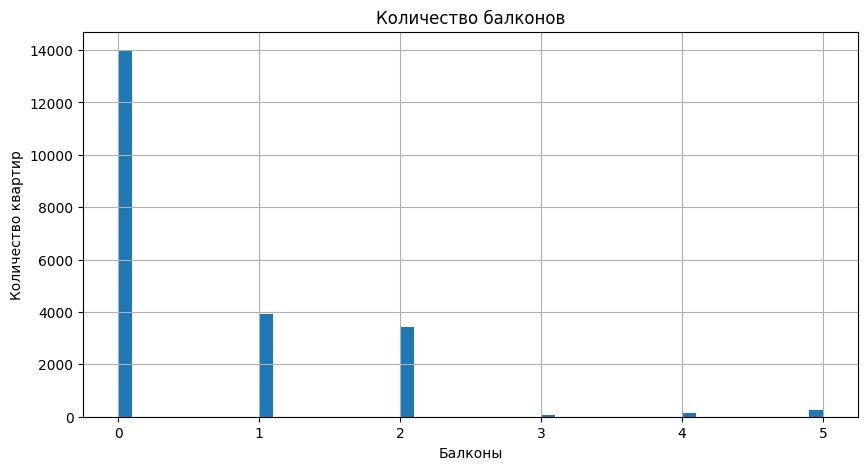

In [64]:
# Построим и изучим гистограмму по 'balcony'
plt.figure(figsize=(10, 5))
plt.hist(data_analys['balcony'], bins=50)
plt.grid()
plt.title('Количество балконов')
plt.xlabel('Балконы')
plt.ylabel('Количество квартир')
plt.show()

Данные выглядят правдоподобно, за исключением того что в более чем в половинее данных значение - `0`. Для определения границ аномальных значений применим функцию `boxplot()`:

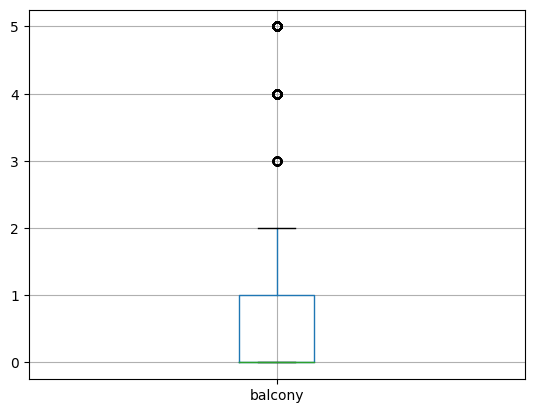

In [65]:
# Построим и изучим диаграмму размаха 'balcony':
data_analys.boxplot('balcony');

Диаграмма размаха указывает на верхнюю границу 2, при этом на гистограмме данные не показывают значительных аномалий Статистика значений также не показала серьезных отклонений. Данные выглядят правдоподобно. Данные оставим.

##### Поиск аномальных значений в `airports_nearest`:

In [66]:
# Изучим статистику значений 'airports_nearest'
data_analys['airports_nearest'].describe()

count    16476.000000
mean     28978.671875
std      12911.820312
min          0.000000
25%      18163.000000
50%      27244.000000
75%      37643.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Среднее растояние до аэропорта ~ 29км. при медиане ~ 27 м², разница незначительная при этом можно предположить, что в данных есть аномально высокие значения, но их не так много. Странным кажется минимальное значение - 0. Квартира находится в аэропорту?.

Посмотрим на минимальные значения `airports_nearest`:

In [67]:
# Отсортируем данные и изучим минимальные значения и количество аномалий
data_analys.sort_values(by='airports_nearest').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000.0,34.700001,2018-09-23,1,2.700000,9,19.799999,3,False,False,False,6.0,2,Санкт-Петербург,0.0,22801.0,0,NaN,0,NaN,60
12899,8,4199.0,56.000000,2017-12-21,2,2.771499,9,27.000000,5,False,False,False,15.0,0,Санкт-Петербург,6450.0,17461.0,0,NaN,1,444.0,24
4017,7,2268.0,35.000000,2017-12-21,1,2.771499,9,14.000000,6,False,False,False,8.0,0,Санкт-Петербург,6450.0,17461.0,0,NaN,1,444.0,25
7778,9,2750.0,29.000000,2017-02-19,1,2.500000,4,15.000000,1,False,False,False,6.0,0,Санкт-Петербург,6914.0,21486.0,1,215.0,0,NaN,43
23150,3,6490.0,62.500000,2015-03-18,2,2.771499,24,33.500000,15,False,False,False,9.0,4,Санкт-Петербург,6949.0,13165.0,1,711.0,0,NaN,917


In [68]:
# Удаляем аномальные значения в 'airports_nearest':
data_analys = data_analys.query('airports_nearest != 0 or airports_nearest.isna()')

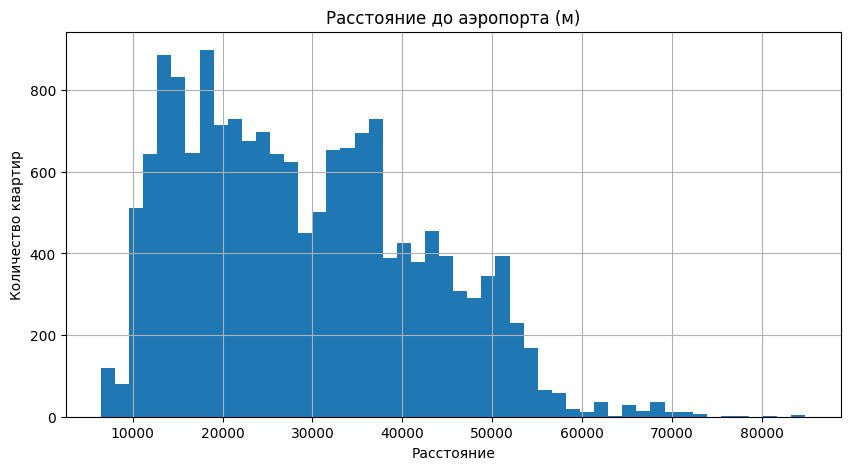

In [69]:
# Построим и изучим гистограмму по 'airports_nearest'
plt.figure(figsize=(10, 5))
plt.hist(data_analys['airports_nearest'], bins=50)
plt.grid()
plt.title('Расстояние до аэропорта (м)')
plt.xlabel('Расстояние')
plt.ylabel('Количество квартир')
plt.show()

В данных присутствуют аномально высокие знчения, начиная от 60км количество значений сильно снизилось. Для определения границ аномальных значений применим функцию `boxplot()`:

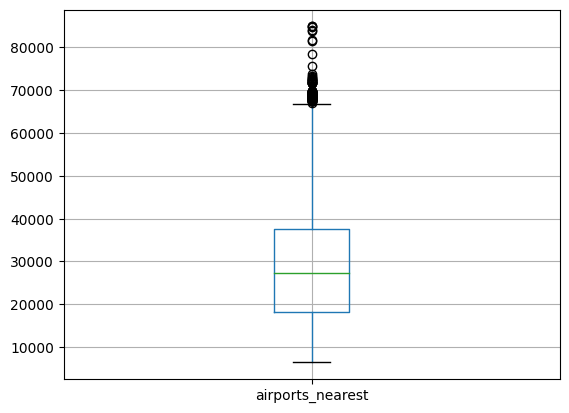

In [70]:
# Построим и изучим диаграмму размаха 'airports_nearest':
data_analys.boxplot('airports_nearest');

Диаграмма размаха указывает на верхнюю границу 70км, гистограмма - 60км. Расстояние до аэропорта врятли можно назвать ключевым параметром, поэтому все данные оставим. 

##### Поиск аномальных значений в `city_centers_nearest`:

In [71]:
# Изучим статистику значений 'city_centers_nearest'
data_analys['city_centers_nearest'].describe()

count    16490.000000
mean     14802.682617
std       8498.125977
min        287.000000
25%      10376.750000
50%      13486.000000
75%      16592.250000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Среднее расстояние до центра города ~ 15.3 км. при медиане ~ 13.8², разница незначительная при этом можно предположить, что в данных есть аномально высокие значения, но их не так много. Распределение данных кажется правдоподобным.

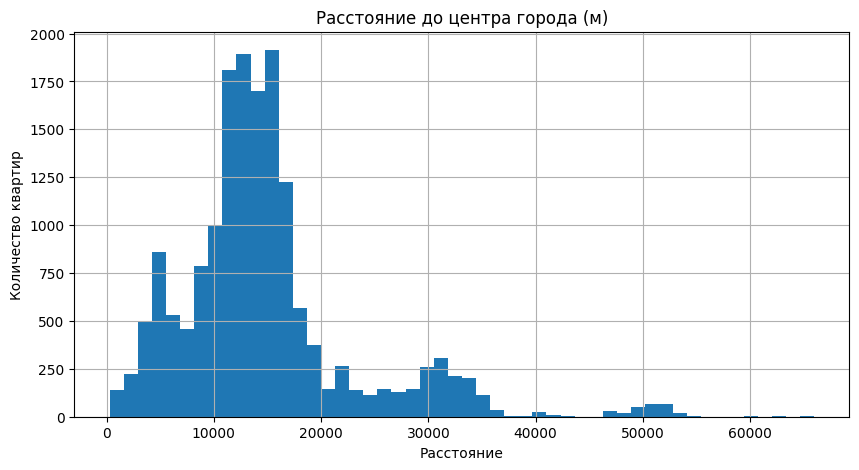

In [72]:
# Построим и изучим гистограмму по 'city_centers_nearest'
plt.figure(figsize=(10, 5))
plt.hist(data_analys['city_centers_nearest'], bins=50)
plt.grid()
plt.title('Расстояние до центра города (м)')
plt.xlabel('Расстояние')
plt.ylabel('Количество квартир')
plt.show()

Действительно, в данных присутствуют аномально высокие знчения, при этом выделяются пики на уровне 30км и 50км. Возможно на этом удалении от центра есть много населенных пунктов. Данные кажутся правдоподобными. Для определения границ аномальных значений применим функцию `boxplot()`:

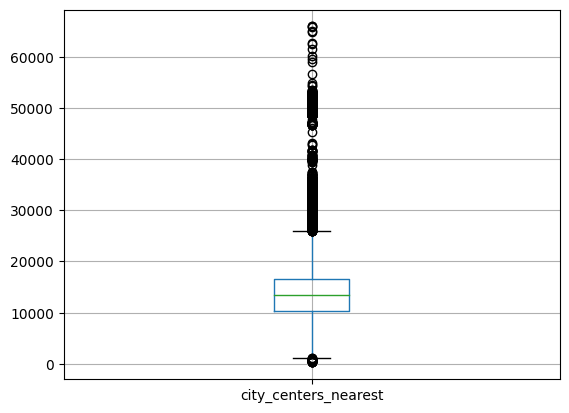

In [73]:
# Построим и изучим диаграмму размаха 'city_centers_nearest':
data_analys.boxplot('city_centers_nearest');

Диаграмма размаха указывает на границы ~ от 2,5-3 км до 25км, при этом на гистограмме данные довольно часто встречаются до значения 35-36км, а на уровнях 30, 40, 50км все еще встречаются довольно много значений. Статистика значений также не показала серьезных отклонений. Данные до 55км оставим, остальные удалим.

In [74]:
# Удаляем аномальные значения в 'city_centers_nearest':
data_analys = data_analys.query('city_centers_nearest <= 55000 or city_centers_nearest.isna()')

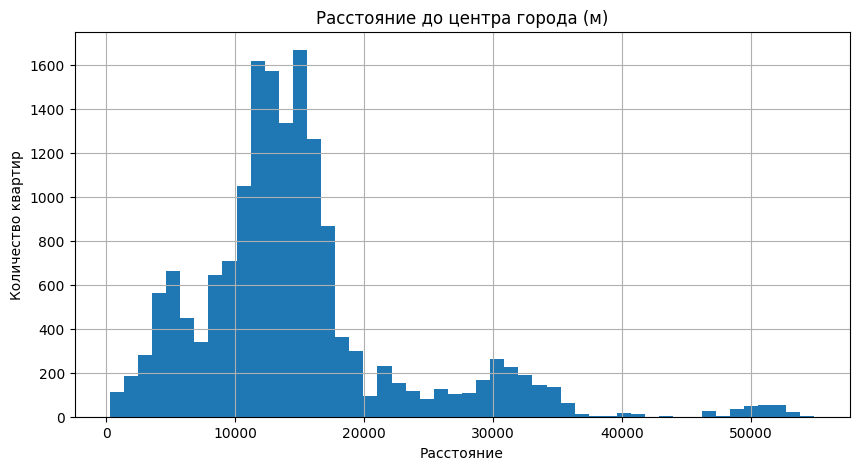

In [75]:
# Построим гистограмму по 'city_centers_nearest' после удаления аномальных значений:
plt.figure(figsize=(10, 5))
plt.hist(data_analys['city_centers_nearest'], bins=50)
plt.grid()
plt.title('Расстояние до центра города (м)')
plt.xlabel('Расстояние')
plt.ylabel('Количество квартир')
plt.show()

Данные выглядят правдоподобно.

##### Поиск аномальных значений в `parks_nearest`:

In [76]:
# Изучим статистику значений 'parks_nearest'
data_analys['parks_nearest'].describe()

count    6988.000000
mean      494.237396
std       339.224915
min         1.000000
25%       292.750000
50%       458.000000
75%       616.250000
max      3190.000000
Name: parks_nearest, dtype: float64

Среднее расстояние до ближайшего парка ~ 495м. при медиане ~ 460м, разница незначительная при этом можно предположить, что в данных есть аномально высокие значения, но их не так много. Распределение данных кажется правдоподобным. Странным кажется минимальное значение - 1м. Изучим данные подробнее:

Посмотрим на минимальные значения `parks_nearest`:

In [77]:
# Отсортируем данные и изучим минимальные значения и количество аномалий
data_analys.sort_values(by='parks_nearest').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14624,8,3770.00,45.400002,2019-03-20,2,2.771499,9,28.430000,2,False,False,False,6.900000,0,Санкт-Петербург,43932.0,16436.0,1,1.0,0,NaN,42
11949,7,4500.00,44.000000,2017-11-24,2,2.600000,9,30.000000,7,False,False,False,7.000000,0,Санкт-Петербург,11806.0,12292.0,1,3.0,1,508.0,82
22941,8,10965.00,69.300003,2019-01-10,1,3.000000,4,48.900002,4,True,False,False,12.137597,2,Зеленогорск,73391.0,54490.0,3,4.0,1,217.0,110
9344,12,3000.00,28.100000,2017-07-25,1,2.500000,9,17.000000,1,False,False,False,5.600000,0,Санкт-Петербург,12051.0,11665.0,1,7.0,1,780.0,440
20193,3,11809.67,102.599998,2017-04-21,3,2.771499,9,58.582512,3,False,False,False,17.799999,2,Санкт-Петербург,27562.0,6410.0,2,9.0,2,480.0,90


Возможно квартиры с расстоянием до парка в 1, 3, 7м. находятся в домах расположенных на границе парка? Данных слишком мало чтобы сказать что они являяются существенными выбросами. Данные оставим.

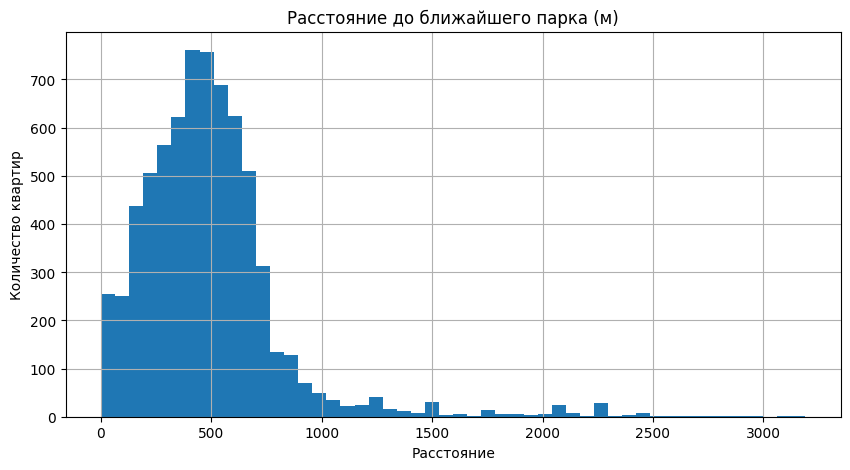

In [78]:
# Построим и изучим гистограмму по 'parks_nearest'
plt.figure(figsize=(10, 5))
plt.hist(data_analys['parks_nearest'], bins=50)
plt.grid()
plt.title('Расстояние до ближайшего парка (м)')
plt.xlabel('Расстояние')
plt.ylabel('Количество квартир')
plt.show()

С расстоянием до 2,5 км квартиры всречаются довольно часто после 2,5км значений очень мало. Для определения границ аномальных значений применим функцию `boxplot()`:

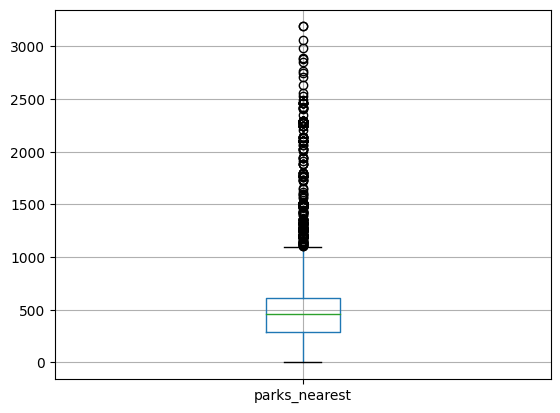

In [79]:
# Построим и изучим диаграмму размаха 'parks_nearest':
data_analys.boxplot('parks_nearest');

Диаграмма размаха указывает на верхнюю границу примерно 1,1км, при этом на гистограмме данные довольно часто встречаются до значения 2,5км. Статистика значений также не показала серьезных отклонений. Расстояние до ближайшего парка нельзя назвать ключевым параметром, тем более что данные кажутся правдоподобными. Данные оставим.

### Результаты работы с аномальными значениями

С помощью статистики числовых значений и визуализации данные параметры объявлений были изучены на предмет аномальных значений. Проверяемые параметры:
- `last_price` — Цена на момент снятия объявления с публикации
- `total_area` — Общая площадь (м²)
- `rooms` — Количество комнат
- `ceiling_height` — Высота потолков (м)
- `floors_total` — Общее количество этажей в доме
- `living_area` — Жилая площадь (м²)
- `floor` — Этаж
- `kitchen_area` — Площадь кухни (м²)
- `balcony` — Количество балконов
- `airports_nearest` — Расстояние до аэропорта (м)
- `city_centers_nearest` — Расстояние до центра города (м) 
- `parks_nearest` — Расстояние до ближайшего парка (м)

In [80]:
# Зафиксируем количество аномальных значений которые были удалены:
print(f'Размер исходного датасета: {len(data)}')
print(f'Размер датасета без аномальных значений: {len(data_analys)}')
print(f'Из исходных данных были удалены {len(data) - len(data_analys)} аномальных значений')

Размер исходного датасета: 23699
Размер датасета без аномальных значений: 21840
Из исходных данных были удалены 1859 аномальных значений


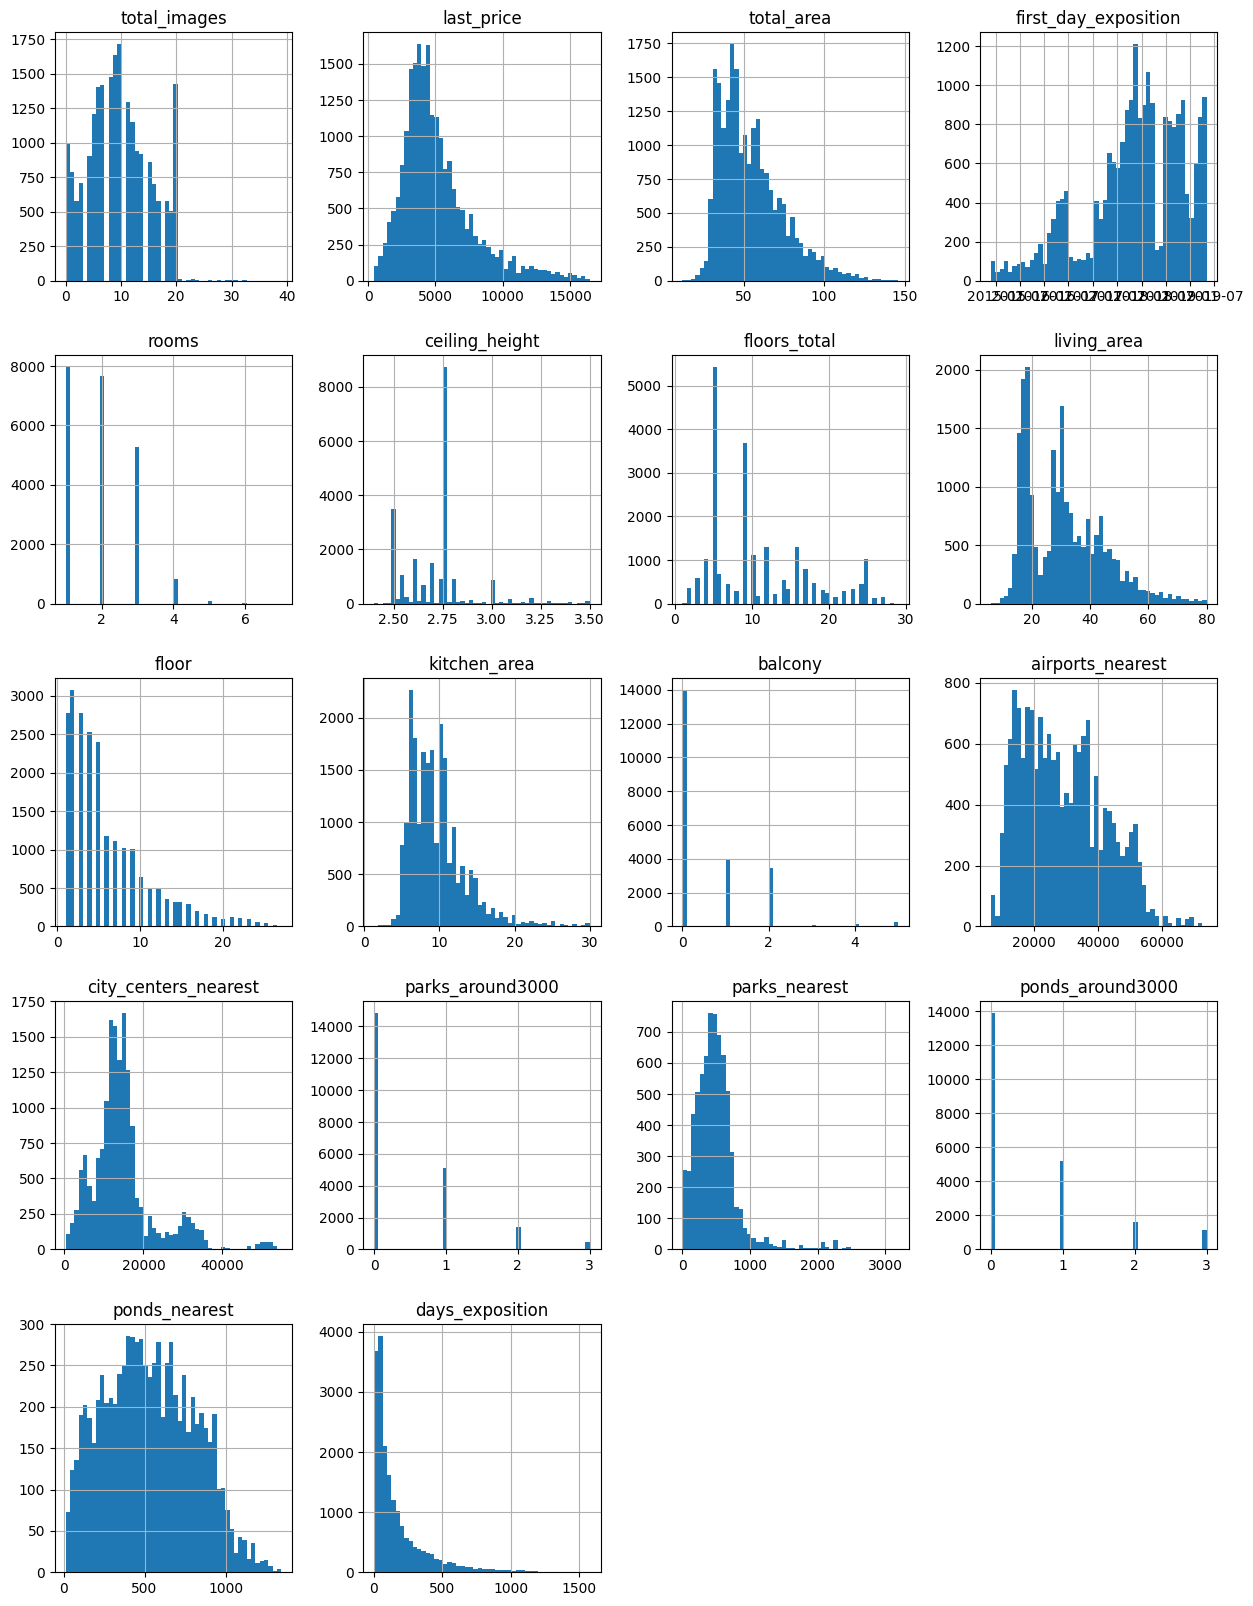

In [81]:
# Оценим гистограмму числовых значений после обработки данных:
data_analys.hist(bins=50, figsize=(15, 20));

- Датасет был очищен от аномальных значений, которые казались неправдоподобными.
- По сравнению с п.1.1 Описание данных - данные в датасете приняли более правдоподобный вид.

### Новые параметры

Данные были предобработаны, но все еще не готовы к формированию выводов. Дополним данные новыми параметрами, которые помогут сделать ключевые выводы, опишем их и визуализируем. Добавим следующие параметры:
 - цена одного квадратного метра
 - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
 - месяц публикации объявления
 - год публикации объявления
 - тип этажа квартиры (категории — «первый», «последний», «другой»)
 - расстояние до центра города в километрах

##### Цена одного квадратного метра

In [82]:
# создадим навый параметр в датасете - цена одного квадратного метра
data_analys['area_price'] = (data_analys['last_price'] / data_analys['total_area']).round(decimals=2) 

In [83]:
# Изучим статистику значений 'area_price'
data_analys['area_price'].describe()

count    21840.000000
mean        93.649775
std         31.363600
min          7.960000
25%         75.190000
50%         93.440000
75%        111.090000
max        387.100000
Name: area_price, dtype: float64

Среднее значение в данных `area_price` немного смещено в большую сторону, есть выбивающиеся значения, но их немного. 

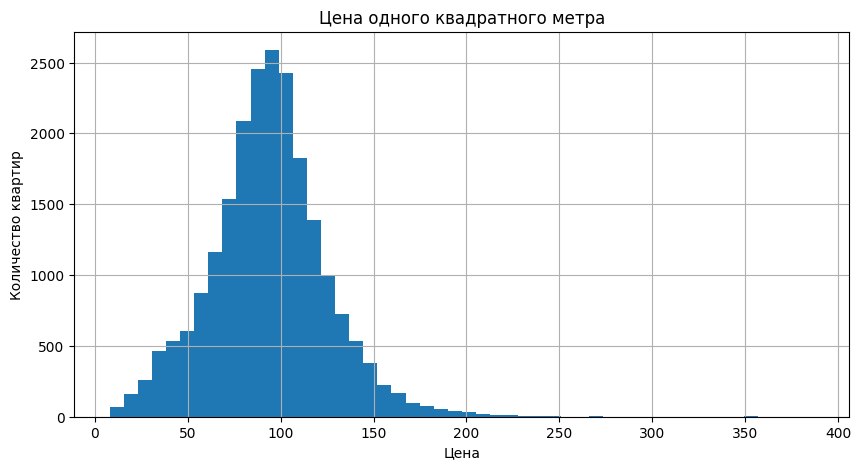

In [84]:
# Построим и изучим гистограмму по 'area_price'
plt.figure(figsize=(10, 5))
plt.hist(data_analys['area_price'], bins=50)
plt.grid()
plt.title('Цена одного квадратного метра')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.show()

На гистограмме видно нормальное распределение с небольшим смещением. 

Можно сделать вывод, что цена одного квадратного метра находится в пределах от 50тыс/м² до 170тыс/м², но есть и редкие значения, которые находятся за пределами общей картины.

##### День недели публикации объявления

In [85]:
# создадим навый параметр в датасете - день недели публикации объявления
data_analys['weekday'] = data_analys['first_day_exposition'].dt.weekday

In [86]:
# Изучим статистику значений 'weekday'
data_analys['weekday'].describe()

count    21840.000000
mean         2.572802
std          1.796102
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

Среднее значение в данных `weekday` немного смещено в большую сторону, есть выбивающиеся значения, но их немного. 

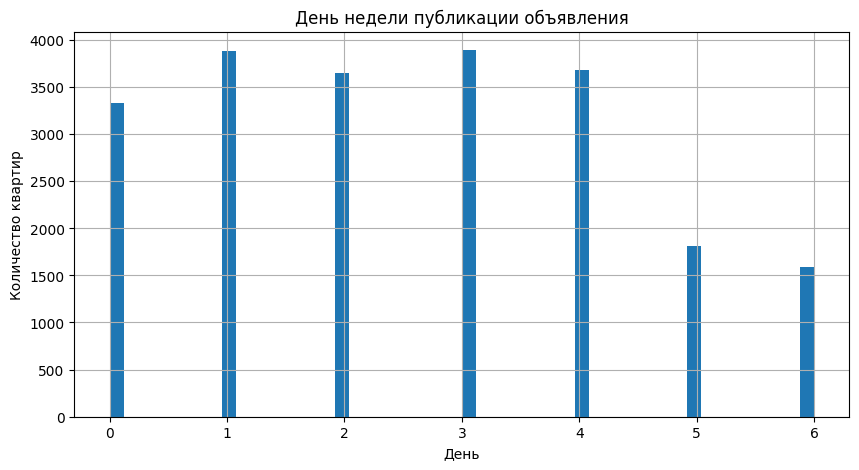

In [87]:
# Построим и изучим гистограмму по 'weekday'
plt.figure(figsize=(10, 5))
plt.hist(data_analys['weekday'], bins=50)
plt.grid()
plt.title('День недели публикации объявления')
plt.xlabel('День')
plt.ylabel('Количество квартир')
plt.show()

На гистограмме можно увидеть в какие дни было выставлено больше объявлений.

Можно сделать вывод, что пользователи охотнее формируют объявления о продаже недвижимости в буднии дни чем на выходных.

##### Месяц публикации объявления

In [88]:
# создадим навый параметр в датасете - месяц публикации объявления
data_analys['month'] = data_analys['first_day_exposition'].dt.month

In [89]:
# Изучим статистику значений 'month'
data_analys['month'].describe()

count    21840.000000
mean         6.395467
std          3.488242
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

Среднее значение в данных `month` немного смещено в большую сторону, есть выбивающиеся значения, но их немного. 

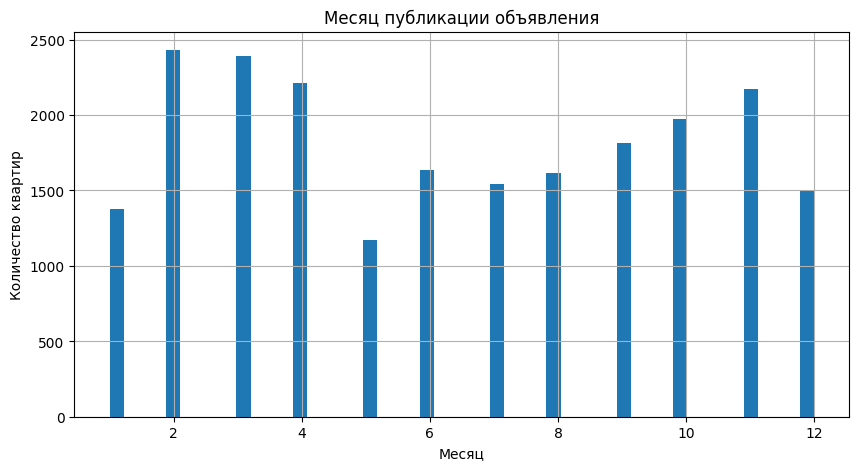

In [90]:
# Построим и изучим гистограмму по 'month'
plt.figure(figsize=(10, 5))
plt.hist(data_analys['month'], bins=50)
plt.grid()
plt.title('Месяц публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()

Сложно сделать вывод и увидеть закономерности в полученных данных. Единственное что выделяется это то, что пользователи чаще формируют объявления о продаже недвижимости в "холодные месяца" за исключением Декабря-Января.

##### Год публикации объявления

In [91]:
# создадим навый параметр в датасете - год публикации объявления
data_analys['year'] = data_analys['first_day_exposition'].dt.year

In [92]:
# Изучим статистику значений 'year'
data_analys['year'].describe()

count    21840.000000
mean      2017.382097
std          1.026469
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: year, dtype: float64

Данные в датасете преставляют собой объявления о продаже недвижимости с 2014 до 2019 года.

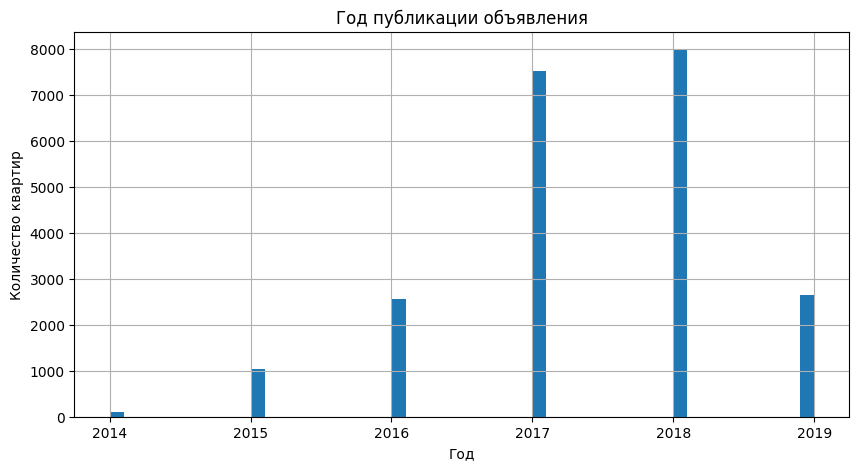

In [93]:
# Построим и изучим гистограмму по 'year'
plt.figure(figsize=(10, 5))
plt.hist(data_analys['year'], bins=50)
plt.grid()
plt.title('Год публикации объявления')
plt.xlabel('Год')
plt.ylabel('Количество квартир')
plt.show()

Количество размещаемых объявления о продаже недвижимости росло вплоть до 2017 года, после чего начало снижаться.

##### Тип этажа квартиры

Для категоризации данных по типу этажа квартиры применим функцию, которая:
- Создаст новый столбец данных в датасете `floor_category` со значением по умолчанию - `Другой`
- Проверит значение `floor` и если оно равно `1`  —  изменит значение `floor_category` на `Первый`
- Проверит значение `floor` и `floors_total` и если они равны  —  изменит значение `floor_category` на `Последний`

In [94]:
# Функция категоризации данных по типу этажа квартиры:
def categorize_floor(df, floor, floors_total):
    df['floor_category'] = 'Другой'
    df.loc[df[floor] == 1, 'floor_category'] = 'Первый'
    df.loc[df[floor] == df[floors_total], 'floor_category'] = 'Последний'

In [95]:
# Применим функцию к нашему датасету
categorize_floor(data_analys, 'floor', 'floors_total')

In [96]:
# Изучим статистику значений 'floor_category'
data_analys['floor_category'].value_counts()

Другой       16051
Последний     3036
Первый        2753
Name: floor_category, dtype: int64

Количество значение в данных `floor_category` распределено правдоподобно - примерно равное количество категорий "Первый" и "Последний".

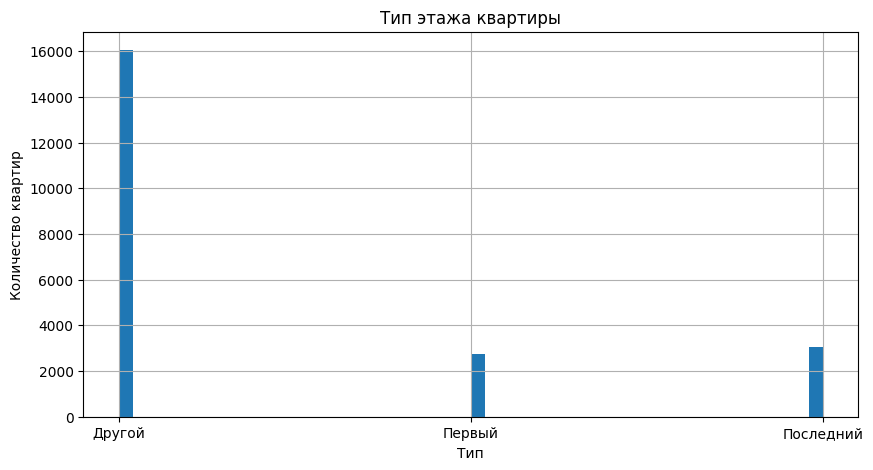

In [97]:
# Построим и изучим гистограмму по 'floor_category'
plt.figure(figsize=(10, 5))
plt.hist(data_analys['floor_category'], bins=50)
plt.grid()
plt.title('Тип этажа квартиры')
plt.xlabel('Тип')
plt.ylabel('Количество квартир')
plt.show()

Вывод, о том что количество значение в данных `floor_category` распределено правдоподобно подтверждает и гистограмма.

##### Расстояние до центра города в километрах

In [98]:
# создадим навый параметр в датасете - расстояние до центра города в километрах
data_analys['city_centers_nearest_km'] = (data_analys['city_centers_nearest'] / 1000).round()

In [99]:
# Изучим статистику значений 'city_centers_nearest_km'
data_analys['city_centers_nearest_km'].describe()

count    16478.000000
mean        14.763503
std          8.409640
min          0.000000
25%         10.000000
50%         13.000000
75%         17.000000
max         55.000000
Name: city_centers_nearest_km, dtype: float64

Среднее значение в данных `area_price` немного смещено в большую сторону, есть выбивающиеся значения, но их немного. 

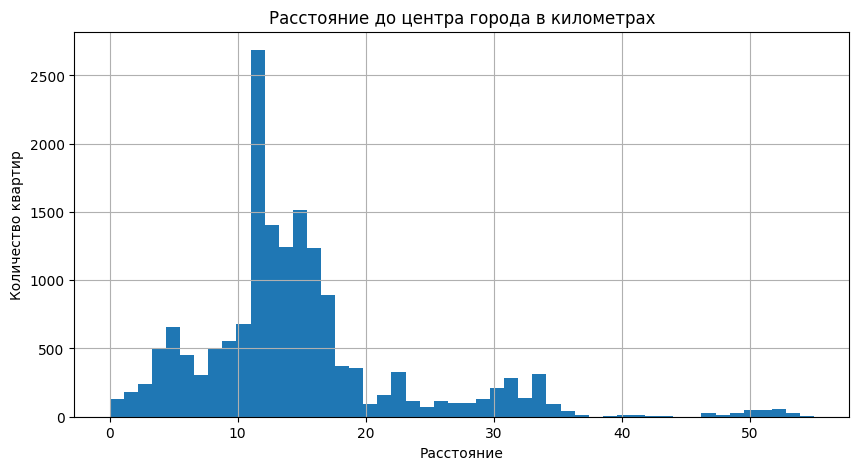

In [100]:
# Построим и изучим гистограмму по 'city_centers_nearest_km'
plt.figure(figsize=(10, 5))
plt.hist(data_analys['city_centers_nearest_km'], bins=50)
plt.grid()
plt.title('Расстояние до центра города в километрах')
plt.xlabel('Расстояние')
plt.ylabel('Количество квартир')
plt.show()

Значения расстояния до центра города в километрах соответствуют изначальным данным (в метрах).

### Как быстро продавались квартиры?

Изучим статистику параметра `days_exposition` и визуализируем данные

In [101]:
# Изучим статистику значений 'days_exposition'
data_analys['days_exposition'].describe()

count    19104.000000
mean       175.436872
std        213.674410
min          1.000000
25%         44.000000
50%         93.000000
75%        223.000000
max       1580.000000
Name: days_exposition, dtype: float64

Параметр `days_exposition` показывает сколько дней было размещено объявление (от публикации до снятия). Минимальный срок размещения объявления о продаже квартиры 1 день, а максимальный больше 4х лет, при этом медианное значение - 95 дней при среднем значении ~ 180 дней (~ в 2 раза больше), это говорит о том что в данных есть аномально большие значения. Изучим данные подробнее и если необходимо удалим аномалии.

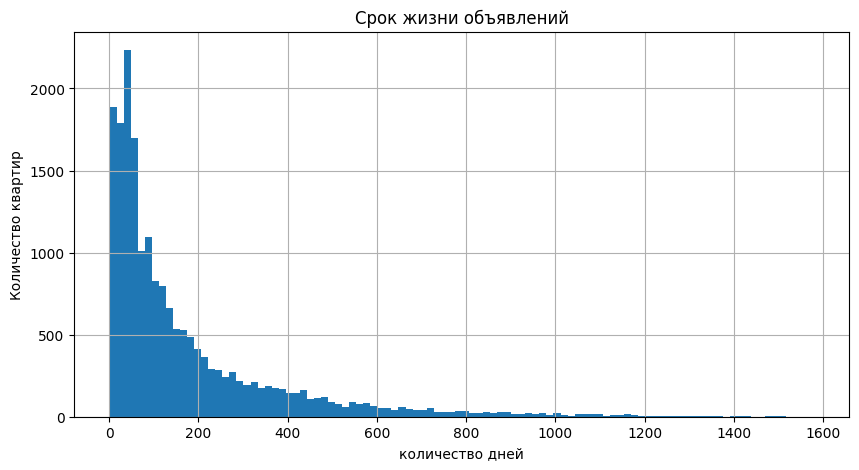

In [102]:
# Построим и изучим гистограмму по 'days_exposition'
plt.figure(figsize=(10, 5))
plt.hist(data_analys['days_exposition'].astype(float), bins=100)
plt.grid()
plt.title('Срок жизни объявлений')
plt.xlabel('количество дней')
plt.ylabel('Количество квартир')
plt.show()

Данных с большим сроком жизни объявлений довольно много, данные встречаются плоть до значений ~ 1400 дней, далее данных практически нет. Попробуем определить границы аномальных значений с помощью `boxplot()`:

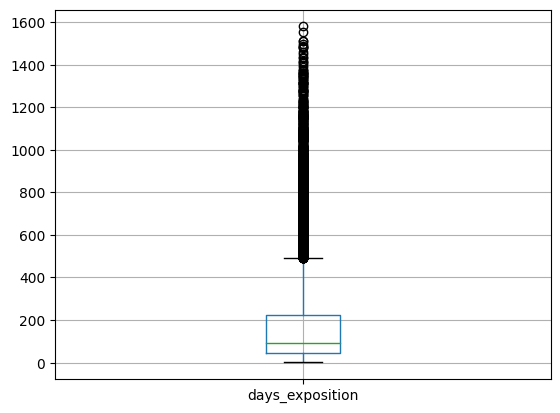

In [103]:
# Построим и изучим диаграмму размаха 'days_exposition':
data_analys.boxplot('days_exposition');

Судя по диаграмме размаха значения больше 500 дней уже являются аномалиями и могут искажать результаты анализа. Это кажется провдоподобным. Продажа недвижимости процесс не быстрый но и не настолько долгий как может показывать часть данных. Возможно с квартирами, которые продаются больше полутора лет что-то не так. Удаляем аномальные значения.

In [104]:
# Удаляем аномальные значения в 'days_exposition':
data_analys = data_analys.query('days_exposition < 501')

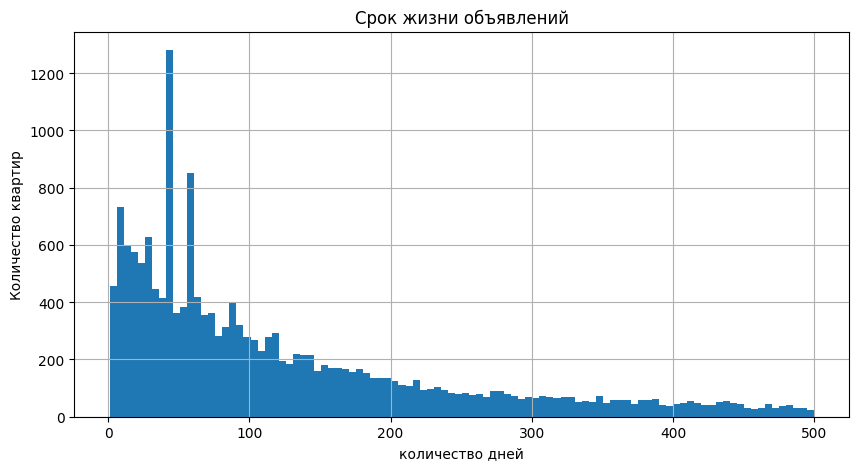

In [105]:
# Построим гистограмму по 'city_centers_nearest' после удаления аномальных значений:
plt.figure(figsize=(10, 5))
plt.hist(data_analys['days_exposition'].astype(float), bins=100)
plt.grid()
plt.title('Срок жизни объявлений')
plt.xlabel('количество дней')
plt.ylabel('Количество квартир')
plt.show()

Встречаются странные пики значений на уровне значений до 100 дней. Изучим данные подробнее:

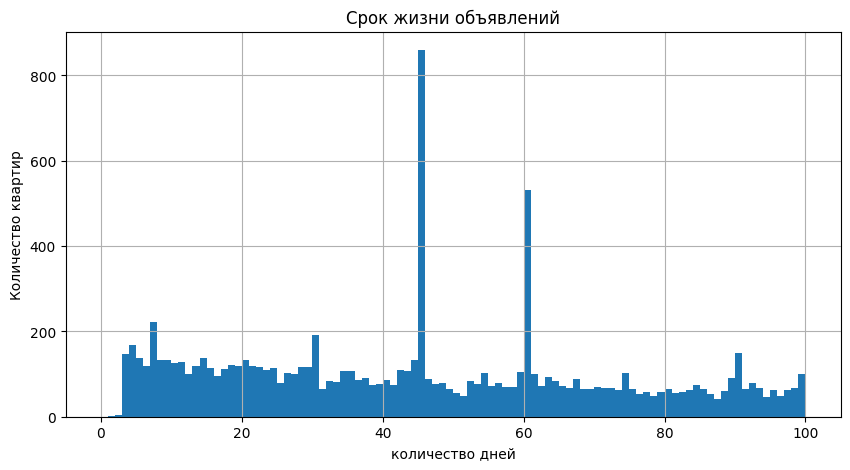

In [106]:
# Построим гистограмму по 'city_centers_nearest' после удаления аномальных значений:
plt.figure(figsize=(10, 5))
plt.hist(data_analys['days_exposition'].astype(float), bins=100, range=[0, 100])
plt.grid()
plt.title('Срок жизни объявлений')
plt.xlabel('количество дней')
plt.ylabel('Количество квартир')
plt.show()

In [107]:
# Изучим подробнее 10 максимальных значений 'days_exposition':
data_analys['days_exposition'].value_counts().head(10)

45    859
60    530
7     221
30    191
4     167
90    149
3     148
14    138
5     138
9     134
Name: days_exposition, dtype: Int64

In [108]:
# Изучим статистику значений 'days_exposition' после удаления аномальных значений:
data_analys['days_exposition'].describe()

count    17578.000000
mean       125.321538
std        118.141496
min          1.000000
25%         41.000000
50%         82.000000
75%        178.000000
max        500.000000
Name: days_exposition, dtype: float64

##### Итоги
В результате рассмотрения вопроса "Как быстро продавались квартиры?" и изучения параметра days_exposition можно сделать следующие выводы:

Большая часть квартир - 75% продается (снимается с продажи) в первые пол года (178 дней), При этом быстрой продажей квартиры можно назвать период в первые 41 дней. А долгой продажей - более 178 дней.
    
В данных есть странные пики значений на ранних сроках размещения объявлений 7, 30, 45 и 60 дней. Нельзя утверждать что в этот период были проданы квартиры, скорее всего объявления были сняты по определенным причинам: Истек срок бесплатного размещения объявления на сервисе, Объявления были выставлены но не прошли модерацию и т.д.
    
По результатам можно сказать следующее: Если квартира, которую выставляют на продажу имеет среднестатистические парметры (цена, площадь, количество комнат и другие) то она с вереятностью в 75% будет продана или снята с продажи в первые 178 дней.

### Какие факторы больше всего влияют на итоговую стоимость объекта?

Для ответа на этот вопрос изучим зависимости между основными параметрами квартиры и ее ценой. Параметры для анализа следующие:
  - Общая площадь
  - Жилая площадь
  - Площадь кухни
  - Количество комнат
  - Даты размещения (день недели, месяц, год)
  - Типа этажа, на котором расположена квартира

Типа этажа, на котором расположена квартира - это категориальные данные со значениями "Первый", "Другой" и "Последний". Для корректной оценки и анализа влияния данного параметра на цену квартиры добавим в датасет новый столбец с псевдокатегориальными данными - `floor_category_numeric` - изменим категории на 1, 2 и 3 соответственно.

In [109]:
#Создание столбца с численными категориями типа этажа:
data_analys['floor_category_numeric'] = 2
data_analys.loc[data_analys['floor_category'] == 'Первый', 'floor_category_numeric'] = 1
data_analys.loc[data_analys['floor_category'] == 'Последний', 'floor_category_numeric'] = 3

In [110]:
# Постороим сводную таблицу для 'last_price' по средним значениям исследуемых количественных параметров
influence = (
    data_analys.pivot_table(
    index='last_price', 
    values=['total_area', 'living_area', 'kitchen_area', 'rooms'])
)
#Обновим индексы и посмотрим первые строки сводной таблицы
influence = influence.reset_index()
influence.head()

,last_price,kitchen_area,living_area,rooms,total_area
0,430.0,9.457869,30.832901,2.000000,54.000000
1,440.0,7.005828,22.839186,1.000000,40.000000
2,450.0,6.635777,23.145679,1.750000,40.099998
3,470.0,7.660131,27.042082,1.333333,40.833332
4,480.0,5.604662,16.000000,1.000000,32.000000


Постороим графики зависимости цены и исследуемых параметров:

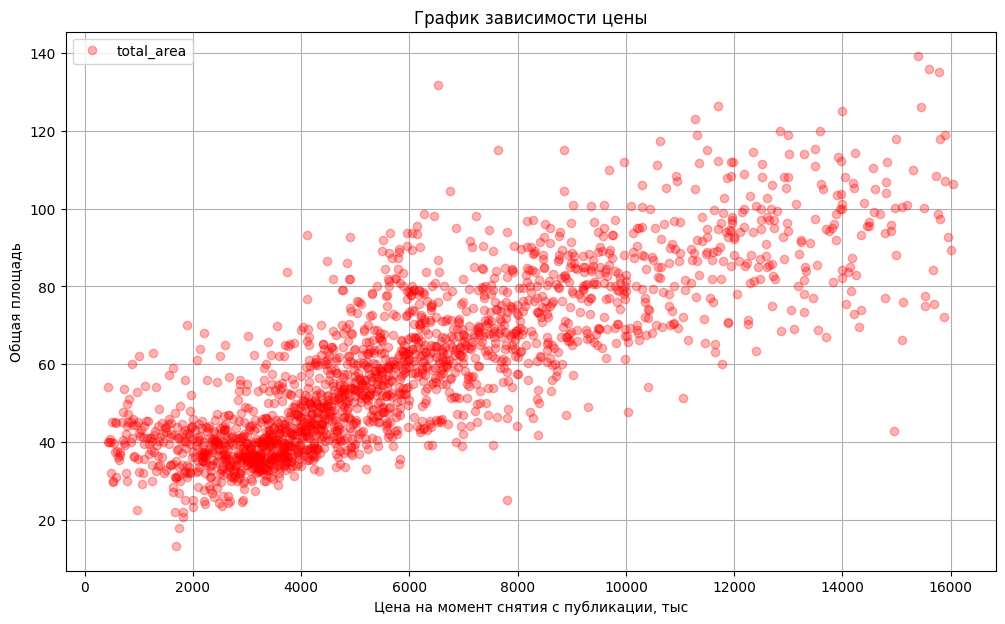

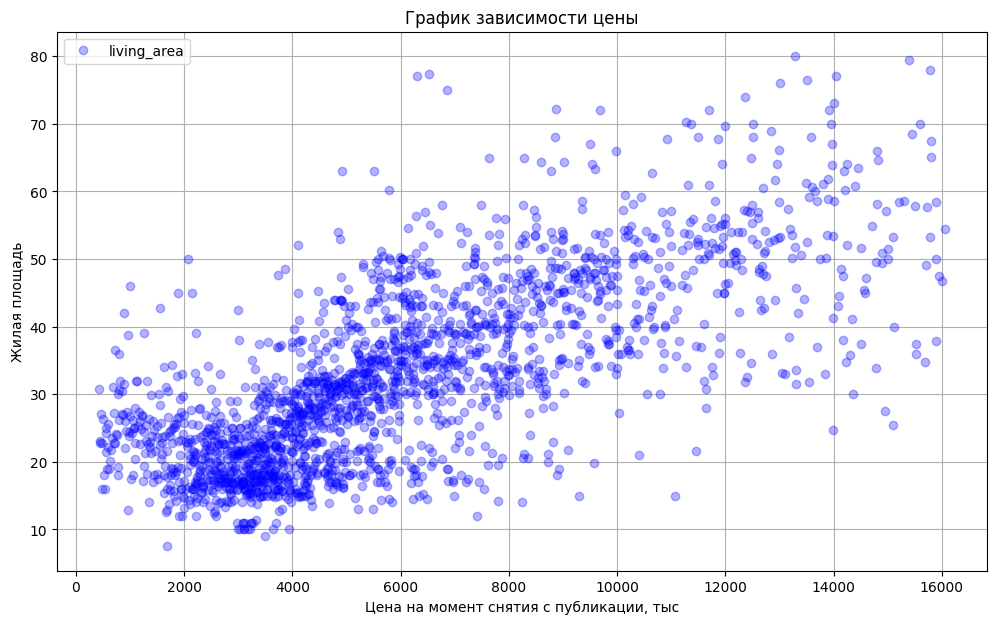

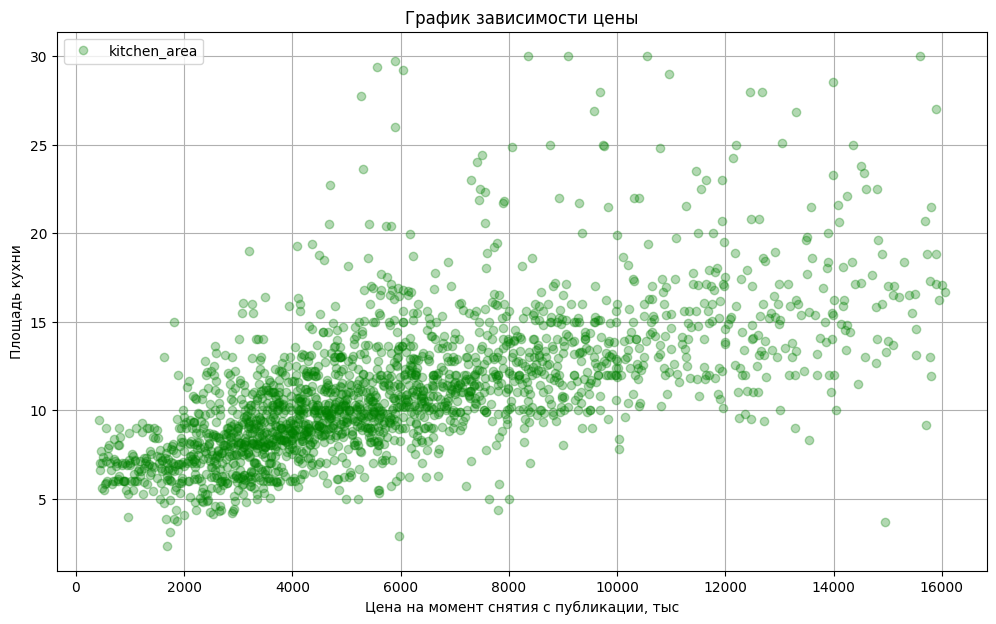

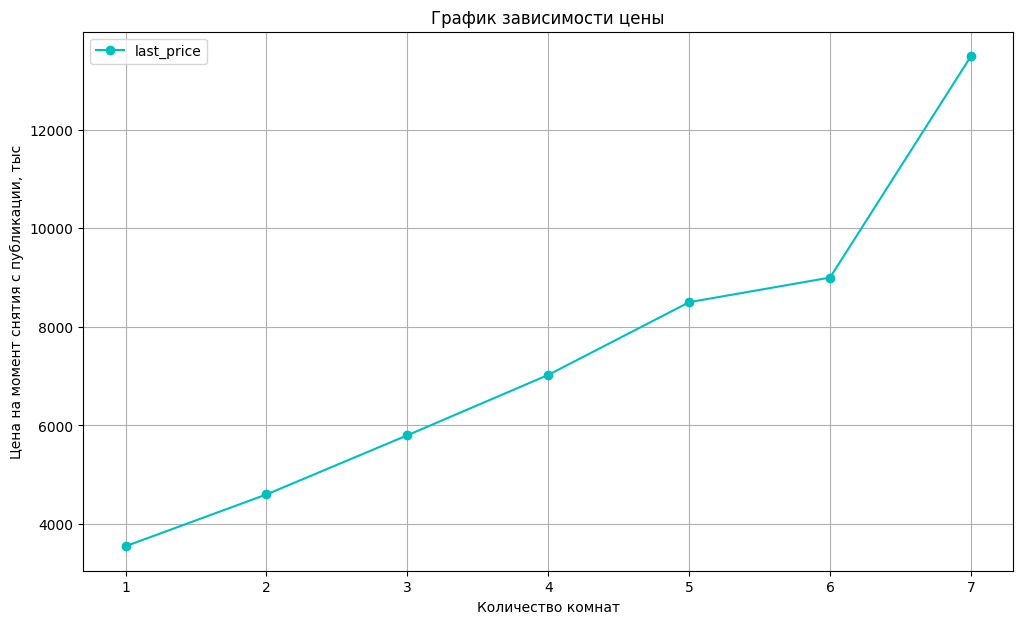

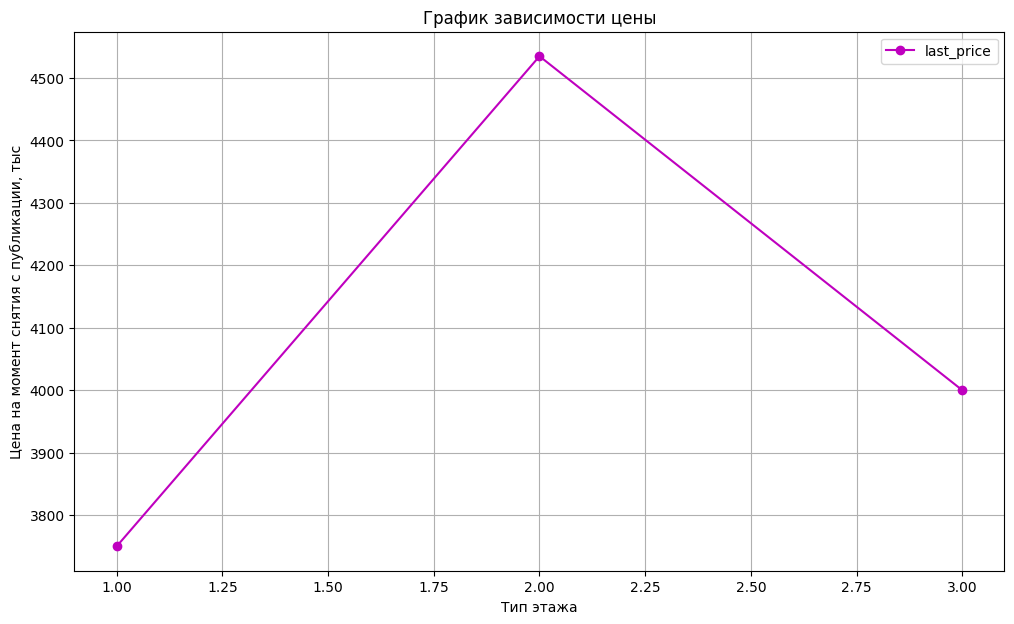

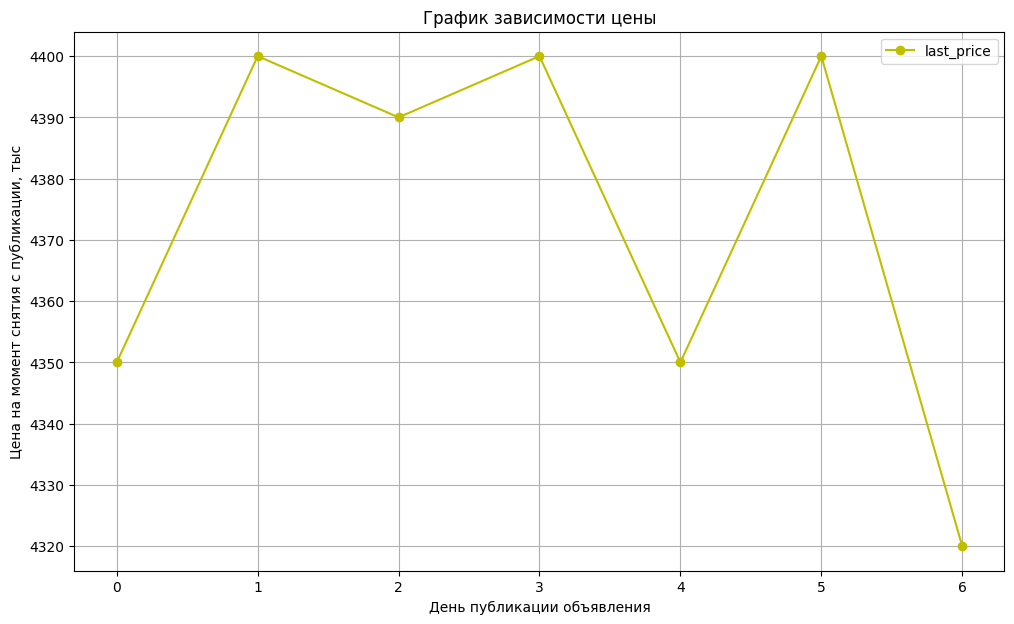

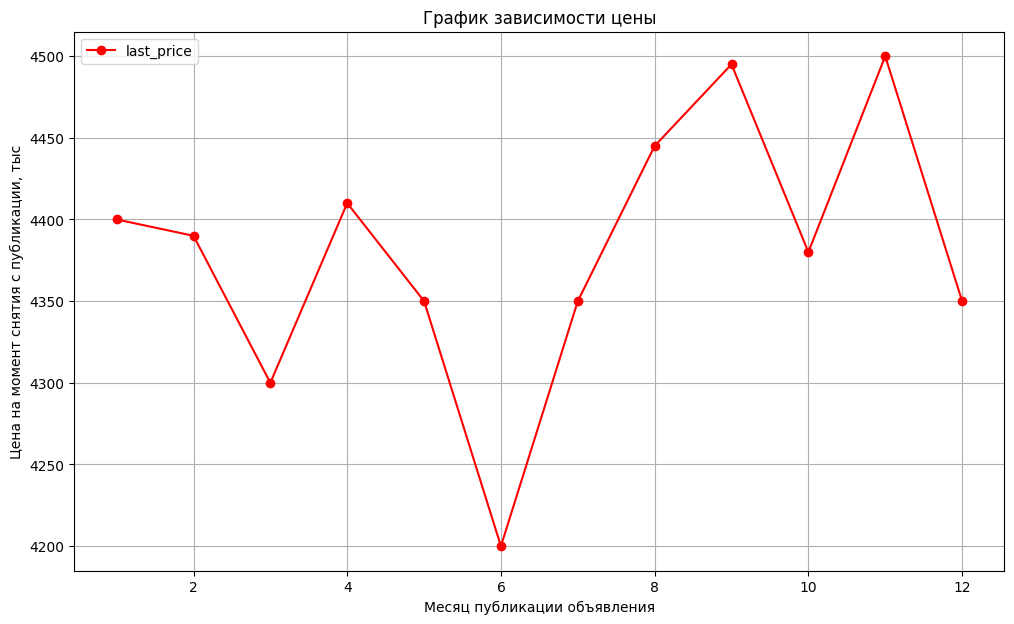

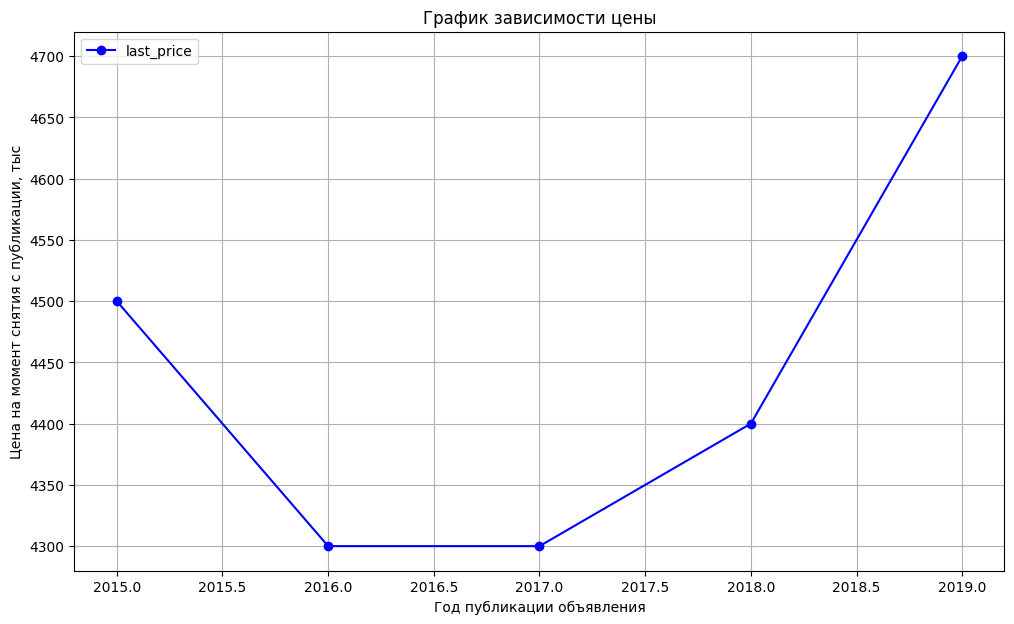

In [111]:
# Создадим словарь для форматирования графиков зависимости
row = {
    'total_area': ['Общая площадь', 'r'], 
    'living_area': ['Жилая площадь', 'b'],
    'kitchen_area': ['Площадь кухни', 'g'],
}
row2= {
    'rooms': ['Количество комнат', 'c'],
    'floor_category_numeric': ['Тип этажа', 'm'],
    'weekday': ['День публикации объявления', 'y'],
    'month': ['Месяц публикации объявления', 'r'],
    'year': ['Год публикации объявления', 'b']
}

# И циклом построим графики зависимости цены и каждого из исследуемых количественных параметров
for i, n in row.items():
    influence.plot(x='last_price', y=i, style='o', color=n[1], grid=True, 
         figsize=(12, 7), alpha=0.3, title='График зависимости цены')
    plt.xlabel('Цена на момент снятия с публикации, тыс')
    plt.ylabel(n[0])
    plt.show()

# Циклом построим графики зависимости цены и каждого из исследуемых качественных параметров    
for i, n in row2.items():
    (
        data_analys.pivot_table(index=i, values='last_price', aggfunc='median')
        .plot(grid=True, style='o-', color=n[1], figsize=(12, 7))
    )
    plt.title('График зависимости цены')
    plt.xlabel(n[0])
    plt.ylabel('Цена на момент снятия с публикации, тыс')

Из построенных графиков видно что:
- Между ценой и общей площадью квартиры есть ярко выраженная взаимосвязь: Чем больше площадь - тем больше цена.


- Между ценой и жилой площадью есть сильная взаимосвясь: Чем больше площадь - тем больше цена. Но при этом на низком уровне значений цены (от 2млн до 4млн) сильный разброс значений площади. Очень много квартир от 2млн до 4млн с одинаковой при этом жилой площадью


- Между ценой и площадью кухни есть зависимость: Чем больше площадь - тем больше цена.


- Между ценой и количеством комнат сильная взаимосвязь: чем больше количество комнат, тем дороже квартира


- Между ценой и типом этажа квартиры взаимосвязи нет. Распределение данных слишком неравномерно, но можно заметить что квартиры на последнем этаже стоят всетаки дороже чем квартиры на первом этаже.


- Между ценой и датой публикации объявления нет явных взаимосвязей. Это касается и Дня недели и Месяца и Года. Но можно выделить следующее:
    - Самые дешёвые квартиры выставляют на продажу в июне
    - С 2017 года стоимость недвижимости заметно растет

Дополнительно изучим значения корреляции между ценой и исследуемыми параметрами для оценки взаимосвязей:

In [112]:
# Посчитаем корреляцию и изучим наиболее взаимосвязанные с ценой параметры:
cor = influence.corr()
cor['last_price'].sort_values(ascending=False)

last_price      1.000000
total_area      0.826950
living_area     0.727993
kitchen_area    0.646081
rooms           0.600912
Name: last_price, dtype: float64

Выводы полученные при анализу графиков подтверждены:
- Наиболее взаимосвязанные параметры с ценой это:
  - Общая площадь 
  - Жилая площадь
  - Площадь кухни
  - Количество комнат

В рамках дополнительного исследования проверим все числовые параметры объявлений из датасета. Возможно есть параметры, которые имеют сильную взаимосвязь с ценой и при этом остались незамеченными:

In [113]:
## Постороим сводную таблицу для 'last_price' по средним значениям всех параметров
influence2 = data_analys.pivot_table(index='last_price')
influence2 = influence2.reset_index()

In [114]:
# Посчитаем корреляцию и изучим наиболее взаимосвязанные с ценой параметры:
cor2 = influence2.corr()
cor2['last_price'].sort_values(ascending=False).head(10)

last_price          1.000000
total_area          0.826950
area_price          0.765481
living_area         0.727993
kitchen_area        0.646081
rooms               0.600912
ponds_around3000    0.417843
ceiling_height      0.389260
parks_around3000    0.377959
parks_nearest       0.161602
Name: last_price, dtype: float64

Дополнительная проверка не принесла успехов, выводы полученные ранее подтверждаются. Хотя знание того, что нет скрытых параметров сильно влияющих на цену квартиры — тоже успех.

По результатам исследования параметров объявления на предмет сильной взаимосвязи с ценой квартиры можно сделать следующие выводы:
- Больше всего на цену квартиры влияют:
   - Общая площадь квартиры
   - Жилая площадь квартиры
   - Площадь кухни
   - Количество комнат

### Средня цена одного квадратного метра в ТОП 10 населённых пунктах.

- Для рассчета средней цены квадратного метра постороим сводную таблицу по ценам за квадратный метр и количеству населенных пунктов
- Отберем топ 10 населенных пунктов по количеству объявлений
- Посчитаем среднюю цену одного квадратного метра населённых пунктах
- Найдем насселенные пункты с самой высокой и самой низкой ценой квадратного метра.

In [115]:
# Постороим сводную таблицу
cities = data_analys.pivot_table(index='locality_name', values='area_price', aggfunc=['count', 'mean'])
cities.columns = ['count', 'area_price_mean']
cities.head(15)

,count,area_price_mean
locality_name,,
unknown,38,90.393158
Бокситогорск,13,17.005385
Волосово,23,40.872609
Волхов,81,34.808765
Всеволожск,299,66.524348
Выборг,185,57.064216
Высоцк,7,50.934286
Гатчина,241,68.048382
Зеленогорск,15,108.140667


In [116]:
# Отберем топ 10 населенных пунктов по количеству объявлений
cities_top = cities.sort_values(by='count', ascending=False).head(10)
cities_top

,count,area_price_mean
locality_name,,
Санкт-Петербург,11412,105.985768
Мурино,489,85.319407
Кудрово,383,94.400601
поселок Шушары,378,77.603069
Всеволожск,299,66.524348
Колпино,291,74.712062
поселок Парголово,282,89.480213
Пушкин,263,100.415627
Гатчина,241,68.048382


In [117]:
# Посчитаем среднюю цену одного квадратного метра населённых пунктах
mean_price = cities_top['area_price_mean'].mean().round(decimals=3)
print(f'Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений: {mean_price}')

Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений: 81.955


Найдем населенные пункты с самой высокой и самой низкой ценой квадратного метра:

In [118]:
#Найдем самую высокую среднюю цену за квадратный метр среди всех населенных пунктов
max_price = cities_top['area_price_mean'].max().round(decimals=3)
print(f'Самая высокая средняя цена за квадратный метр: {max_price}')
cities_top.loc[cities_top['area_price_mean'] == cities_top['area_price_mean'].max()]

Самая высокая средняя цена за квадратный метр: 105.986


,count,area_price_mean
locality_name,,
Санкт-Петербург,11412,105.985768


In [119]:
#Найдем самую низкую среднюю цену за квадратный метр среди всех населенных пунктов
min_price = cities_top['area_price_mean'].min().round(decimals=3)
print(f'Самая низкая средняя цена за квадратный метр: {min_price}')
cities_top.loc[cities_top['area_price_mean'] == cities_top['area_price_mean'].min()]

Самая низкая средняя цена за квадратный метр: 57.064


,count,area_price_mean
locality_name,,
Выборг,185,57.064216


**Итоги**

- Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений: 81 955
- Самая высокая цена за квадратный метр в Санкт-Петербурге: 105 986
- Самая низкая цена за квадратный метр в Ломоносове: 57 064

В топ 10 населенных пунктов по количеству опубликованных обявлений на продажу квартир вошли:
- Санкт-Петербург
- Мурино
- Кудрово	
- поселок Шушары	
- Всеволожск	
- Колпино	
- поселок Парголово
- Пушкин
- Гатчина
- Выборг

### Средняя цена каждого килламетра в Санкт-Петербурге

Для решния данного вопроса сделаем следующее:
- Выберем из датасета все объявления в Санкт-Петербурге
- Отсортируем данные по удаленности от города и посчитаем среднюю цену 
- Визуализируем данные

In [120]:
# Все объявления в Санкт-Петербурге
spb = data_analys.query('locality_name == "Санкт-Петербург"')

In [121]:
# Группируем данные по расстоянию в километрах от центра города и по каждому километру считаем среднее значение 
spb = spb.groupby('city_centers_nearest_km')['last_price'].mean()

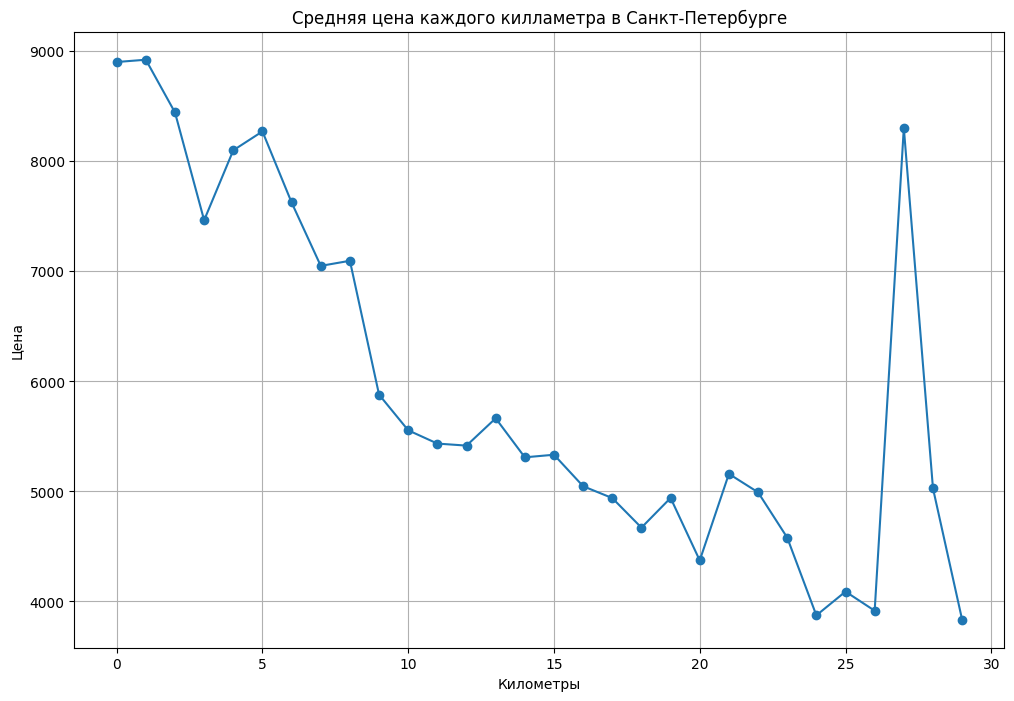

In [122]:
# Визуализируем данные на графике
spb.plot(x='last_price', y='city_centers_nearest_km', style='o-', figsize=(12, 8), grid=True, title='Средняя цена каждого килламетра в Санкт-Петербурге')
plt.xlabel('Километры')
plt.ylabel('Цена')
plt.show()

In [123]:
# Изучим числовые значения:
spb.head(10)

city_centers_nearest_km
0.0    8898.750000
1.0    8919.592593
2.0    8440.639706
3.0    7461.726705
4.0    8096.882360
5.0    8268.354979
6.0    7623.141671
7.0    7047.204337
8.0    7093.463235
9.0    5877.573964
Name: last_price, dtype: float64

##### Итоги
После 5го километра от центра Санкт-Петербурга - средняя стоимость недвижимости ничинает снижаться. При этом есть редкие пики значений где средняя цена квартир ненамного увеличивается, возможно это связано с определенными населенными пунктами.

## Результаты исследования:

**Как быстро продаются квартиры?**
- Большая часть квартир - 75% продается (снимается с продажи) в первые пол года (178 дней), При этом быстрой продажей квартиры можно назвать период в первые 41 дней. А долгой продажей - более 178 дней.
    
- В данных есть странные пики значений на ранних сроках размещения объявлений 7, 30, 45 и 60 дней. Нельзя утверждать что в этот период были проданы квартиры, скорее всего объявления были сняты по определенным причинам: Истек срок бесплатного размещения объявления на сервисе, Объявления были выставлены но не прошли модерацию и т.д.
    
- По результатам можно сказать следующее: Если квартира, которую выставляют на продажу имеет среднестатистические парметры (цена, площадь, количество комнат и другие) то она с вереятностью в 75% будет продана или снята с продажи в первые 178 дней.


**Какие факторы больше всего влияют на итоговую стоимость объекта?**
- Больше всего на цену квартиры влияют:
   - Общая площадь квартиры
   - Жилая площадь квартиры
   - Площадь кухни
   - Количество комнат

**Средня цена одного квадратного метра в ТОП 10 населённых пунктах:**
- Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений: 81 955
- Самая высокая цена за квадратный метр в Санкт-Петербурге: 105 986
- Самая низкая цена за квадратный метр в Ломоносове: 57 064

В топ 10 населенных пунктов по количеству опубликованных обявлений на продажу квартир вошли:
- Санкт-Петербург
- Мурино
- Кудрово	
- поселок Шушары	
- Всеволожск	
- Колпино	
- поселок Парголово
- Пушкин
- Гатчина
- Выборг

**Как стоимость объектов зависит от расстояния до центра города (Санкт-Петербург):**

- После 5го километра от центра Санкт-Петербурга - средняя стоимость недвижимости ничинает снижаться. При этом есть редкие пики значений где средняя цена квартир ненамного увеличивается, возможно это связано с определенными населенными пунктами.